<a href="https://colab.research.google.com/github/AlejandroGiorgio/Fraud_Detection_with_ML/blob/main/Fraud_Detection_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<h1>Introduccion</h1>
En el presente trabajo se busca analizar una dataset de solicitudes fraudulentas. Como hipotesis se plantea que se pueden encontrar variables significativas dentro de las caracteristicas de las solicitudes de crédito que permitan que un modelo de machine learning pueda categorizar mediante diversas tecnicas (como un modelo re regresion logistica con datos desvalaceados), solicitudes de créditos como fraudulentas o no fraudulentas
<br>
<font color='lightblue'>Se plantea como solución analitica del problema:</font>
- °Identificar dentro de la dataset sobre solicitudes de fraudes comprobadas las variables que son relevantes al momento de encontrar un caso de solicitud de crédito como <strong>fraulento</strong>, comparando si estas variables responden de forma distinta al caso de las solicitudes no fradulentas
<br>
- Filtrar la solicitud a traves de un arbol de decision hasta la categoria binaria de: Fraudulenta o No-Fraudulenta
<br>
- Incorporar esas variables a un modelo supervisado de <strong><u>clasificacion</u></strong> y entrenar el mismo para que pueda clasificar una solicitud como <font color='red'>fraudulenta</font>
<br>
- Establecer las bases del modelo para que pueda predecir futuras solicitudes y <font color='greyblue'>clasificarlas bajo este criterio</font>

###Resumen
Durante los dos primeros años de la pandemia del COVID-19, en Argentina, se produjo un incremento de denuncias sobre diferentes modalidades delictivas sucedidas en Internet. El aumento de casos pudo surgir por un mayor uso de las Tecnologías de la Información y las Comunicaciones, de servicios y aplicaciones de Internet, surgidos a partir de la implementación del teletrabajo, la educación a distancia y el pago de servicios, generado por el aumento del comercio electrónico.
Una característica propia de los delitos informáticos cometidos en este contexto excepcional de pandemia es una mayor sofisticación y complejidad en las técnicas de comisión de estos ilícitos, tanto así como la aparición de asociaciones ilícitas y de bandas con cierto grado de organización, que toman al cibercrimen como emprendimiento delictivo.
Las modalidades detectadas más frecuentes pueden agruparse en tres tipos: los fraudes y estafas en línea a nivel de usuarios particulares, los ataques de ransomware a organizaciones y el blanqueo ilícito de capitales por Internet. Esto arroja como resultado la presencia de nuevas modalidades de delitos ya existentes.

###Motivación
Dado el incremento de estos casos, constituyendo el phishing y el fraude bancario la modalidad de ciberdelito mas comun y en creciente aumento, afectando sobre todo a las personas fisicas las cuales resultan ser las victimas mas vulnerables a estas modalidades, se realiza el trabajo esperando encontrar en la informaicon recabada un metodo para predecir que solicitudes puntuales pueden ser fradulentas y por tanto generar una barrera u mayor control evitando esta victimizacion.

###Audiencia
La audiencia principal de este tipo de proyectos es el area de riesgo/prevencion de fraude de una entidad financiera/banco/fintech, para que mediante un estudio previo por parte de especialistas se defina en similares terminos una dataset que identifique los casos de fraude, que recabe los mismos datos y que pueda implementar el metodo para auditar las solicitudes de crédito y de esa forma reducir la tasa de victimización de sus clientes.

###Preguntas que se buscaran responder en este trabajo

- ¿Cómo puede beneficiarse una entidad financiera/banco/fintech al implementar un método de detección de fraudes en las solicitudes de crédito?
.¿De qué manera podría reducirse la tasa de victimización de los clientes al auditar las solicitudes de crédito mediante este método?
- ¿Cuál es el impacto potencial de predecir y filtrar las solicitudes fraudulentas en términos de seguridad y confianza para los clientes de una entidad financiera/banco/fintech?
- ¿Cuáles podrían ser los beneficios económicos para una entidad financiera al implementar un sistema de detección de fraudes en las solicitudes de crédito?
- ¿Cómo podría mejorar la eficiencia operativa de una entidad financiera/banco/fintech al utilizar este método de detección de fraudes en las solicitudes de crédito?
- ¿Cuáles podrían ser las implicaciones legales y reputacionales para una entidad financiera si no implementa un sistema efectivo de detección de fraudes en las solicitudes de crédito?
- ¿Cómo podría mejorar la experiencia del cliente al garantizar un mayor control y seguridad en el proceso de solicitud de crédito mediante la detección de fraudes?

##Data Analysis

<h3>Primero importaremos la dataset de <font color='red'>solicitudes fraudulentas</font></h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/MyDrive/Base.csv'
df = pd.read_csv(file_path)
df.sample(10)


fraud_bool  income  name_email_similarity  prev_address_months_count  \
71199            0     0.4               0.873730                         57   
21320            0     0.8               0.479312                         93   
81393            0     0.8               0.259312                         31   
123492           0     0.5               0.442856                         -1   
81242            0     0.5               0.546661                         -1   
244819           0     0.4               0.682062                         -1   
97600            1     0.9               0.864588                         -1   
187569           0     0.8               0.832822                         -1   
113848           0     0.9               0.169978                         -1   
58162            0     0.9               0.814779                         -1   

        current_address_months_count  customer_age  days_since_request  \
71199                            141            30            0.007729   
21320                              6            40            0.018770   
81393                              4            30            0.000301   
123492                            10            30            0.006638   
81242                             38            20            0.777323   
244819                           199            20            0.000497   
97600                            149            40            0.016929   
187569                            26            30            0.024583   
113848                           181            30            2.397376   
58162                            175            50            0.005422   

        intended_balcon_amount payment_type  zip_count_4w  ...  \
71199                -0.914474           AB          3367  ...   
21320                -1.639614           AC          1054  ...   
81393                -0.789232           AB           277  ...   
123492               -1.045555           AB          1103  ...   
81242                23.956672           AA          1060  ...   
244819               -0.526665           AB          1130  ...   
97600                -0.430742           AC          1325  ...   
187569               29.298751           AA           925  ...   
113848               -1.170560           AC           442  ...   
58162                -0.673279           AB           427  ...   

        has_other_cards  proposed_credit_limit  foreign_request    source  \
71199               0.0                  200.0              0.0  INTERNET   
21320               0.0                 1000.0              0.0  INTERNET   
81393               0.0                  200.0              0.0  INTERNET   
123492              0.0                  200.0              0.0  INTERNET   
81242               1.0                  200.0              0.0  INTERNET   
244819              0.0                  200.0              0.0  INTERNET   
97600               0.0                 1000.0              0.0  INTERNET   
187569              1.0                  200.0              0.0  INTERNET   
113848              1.0                  200.0              0.0   TELEAPP   
58162               0.0                 1500.0              0.0  INTERNET   

        session_length_in_minutes device_os  keep_alive_session  \
71199                    5.327917   windows                 0.0   
21320                    2.117711   windows                 0.0   
81393                    7.167516     linux                 1.0   
123492                   3.452518     other                 0.0   
81242                   12.530470     other                 0.0   
244819                   6.788114     other                 0.0   
97600                    7.146520   windows                 0.0   
187569                   7.725725     other                 1.0   
113848                   2.152263     other                 0.0   
58162                    2.114293   windows                 0.0   


A continuacion se analiza que porcentaje de la muestra corresponde a una solicitud fradulenta y cual no, para entender la muestra es balanceada o desbalanceada. Aqui se puede apreciar que es claramente desbalanceada. Solo un 0,02% de los casos son confirmados como solicitud fraudulenta

In [ ]:
a = round(df['fraud_bool'].value_counts()/len(df['fraud_bool']),2)
print(a)

0    0.98
1    0.02
Name: fraud_bool, dtype: float64


(([<matplotlib.patches.Wedge at 0x7f643632d0c0>,
  [Text(-1.098756446157188, 0.05229026704872261, 'not-fraud'),
   Text(1.0987564456982097, -0.05229027669306679, 'fraud')],
  [Text(-0.5993216979039206, 0.028521963844757785, '98.5%'),
   Text(0.5993216976535688, -0.028521969105309155, '1.5%')]),
 Text(0.5, 1.0, 'Proporcion de casos fraudulentos'))

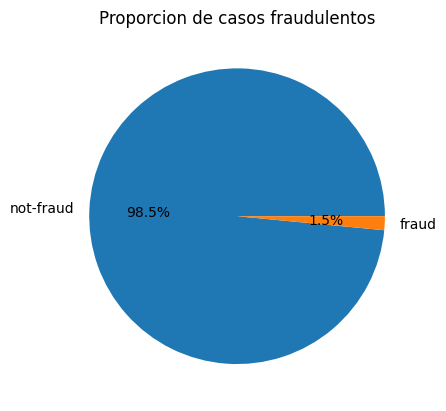

In [ ]:
plt.pie(df['fraud_bool'].value_counts(), labels = ["not-fraud","fraud"],autopct ='%1.1f%%'), plt.title("Proporcion de casos fraudulentos")

Esto denosta una gran proporcion de casos que no son fraude de una pequeña proporcion de casos que si lo son, lo que dificultará su deteccion

In [ ]:
df_fraud = df[df.fraud_bool == 1]
df_fraud.shape

(4018, 32)

Hago un overview de la dataset para encontrar que tipos de datos tengo para analizar

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265441 entries, 0 to 265440
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        265441 non-null  int64  
 1   income                            265441 non-null  float64
 2   name_email_similarity             265441 non-null  float64
 3   prev_address_months_count         265441 non-null  int64  
 4   current_address_months_count      265441 non-null  int64  
 5   customer_age                      265441 non-null  int64  
 6   days_since_request                265441 non-null  float64
 7   intended_balcon_amount            265441 non-null  float64
 8   payment_type                      265441 non-null  object 
 9   zip_count_4w                      265441 non-null  int64  
 10  velocity_6h                       265441 non-null  float64
 11  velocity_24h                      265441 non-null  f

In [ ]:
columnCategory = []
for col in df.columns:
  if(df[col].nunique()<10) and (df[col].dtype =="object"):
    columnCategory.append(col)

print (f"Las columnas categoricas son{columnCategory}")
print(len(columnCategory))

Las columnas categoricas son['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
5


In [ ]:
numericColumns = list(set(df.columns) - set(columnCategory))
numericColumns = [x for x in numericColumns if x != "fraud_bool"]
print(f"Columnas numericas son: {numericColumns}")
print(len(numericColumns))


Columnas numericas son: ['days_since_request', 'prev_address_months_count', 'velocity_24h', 'bank_months_count', 'current_address_months_count', 'keep_alive_session', 'name_email_similarity', 'zip_count_4w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'income', 'session_length_in_minutes', 'bank_branch_count_8w', 'velocity_6h', 'intended_balcon_amount', 'device_distinct_emails_8w', 'foreign_request', 'phone_home_valid', 'phone_mobile_valid', 'proposed_credit_limit', 'month', 'has_other_cards', 'email_is_free', 'device_fraud_count', 'customer_age', 'velocity_4w']
26


###Analisis univariado de las variables

Densidad de la edad de las victimas de fraude

<Axes: >

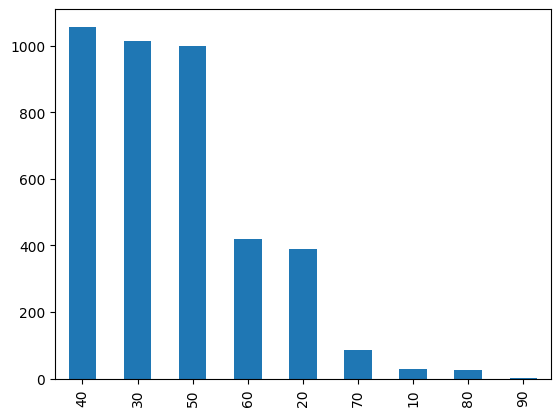

In [ ]:
age = df[df['fraud_bool'] == 1]
age['customer_age'].value_counts().plot.bar()

Distribucion del sistema operativo de los clientes

([<matplotlib.patches.Wedge at 0x7f64341642e0>,
 [Text(0.5402413750115593, 0.9581958342247267, 'linux'),
  Text(-1.099659613446498, -0.027363014356954662, 'other'),
  Text(0.3688560591598084, -1.0363132767754624, 'windows'),
  Text(1.0741374472723593, -0.23712600947011253, 'macintosh'),
  Text(1.0997583691555353, -0.023054922952759387, 'x11')])

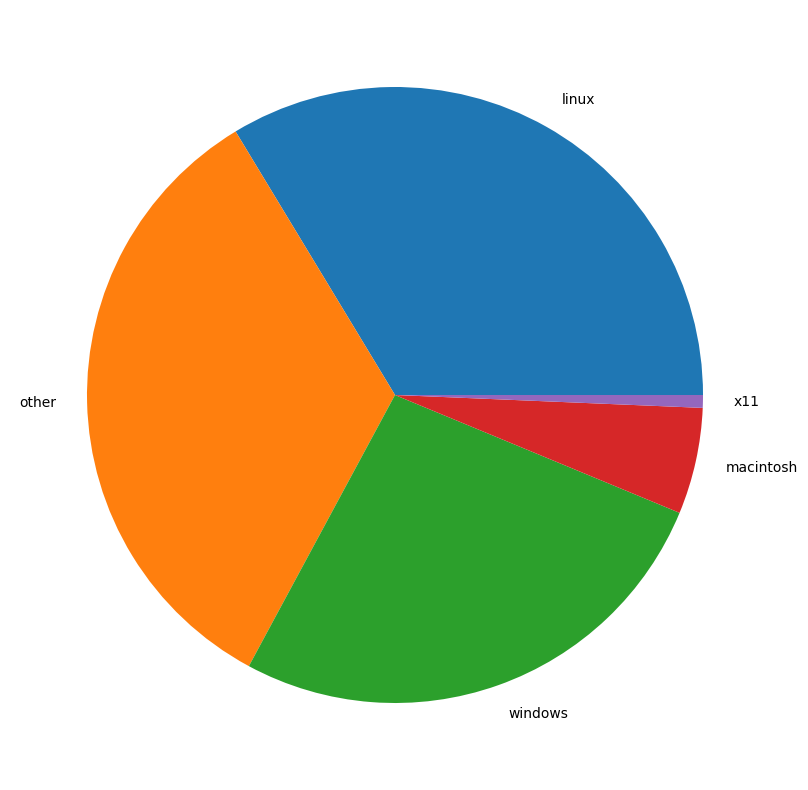

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(df["device_os"].value_counts(), labels = df["device_os"].value_counts().index)


¿Cual es la media del ingreso de los clientes?¿Hay uniformidad de ingresos o se presentan casos extremos?

<Axes: >

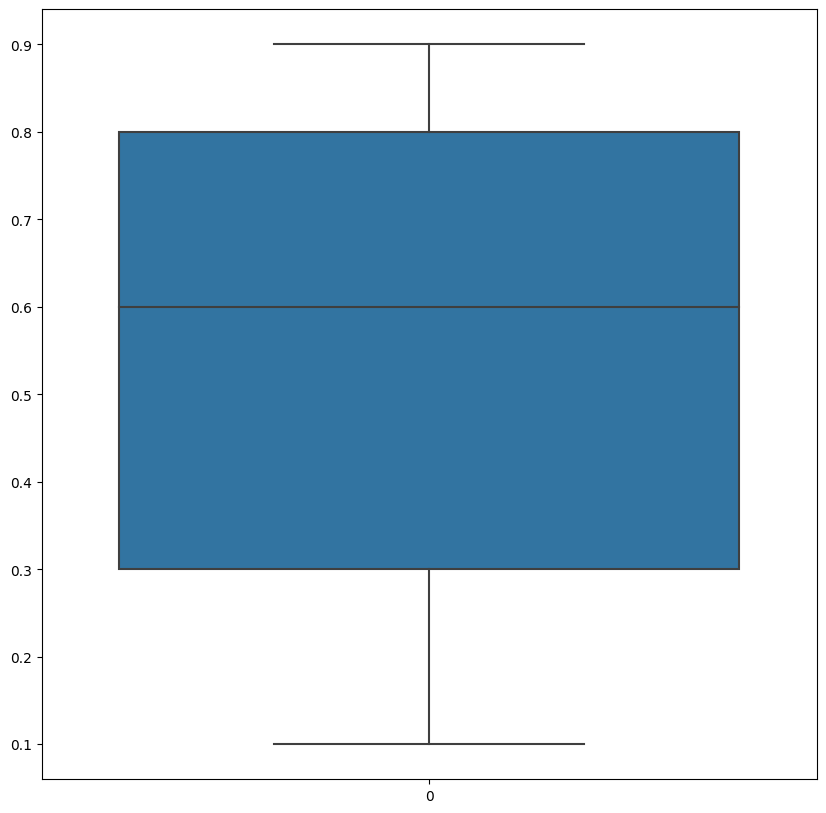

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(df['income'])

### Analisis Bivariado para la primera seleccion de variables

Primero paso a analizar las variables continuas y compararlas con el indice de fraude para encontrar insights de interes o comprender cual de estas variables resultan mas significativas para encontrar patrones comunes en las solicitudes fraudulentas

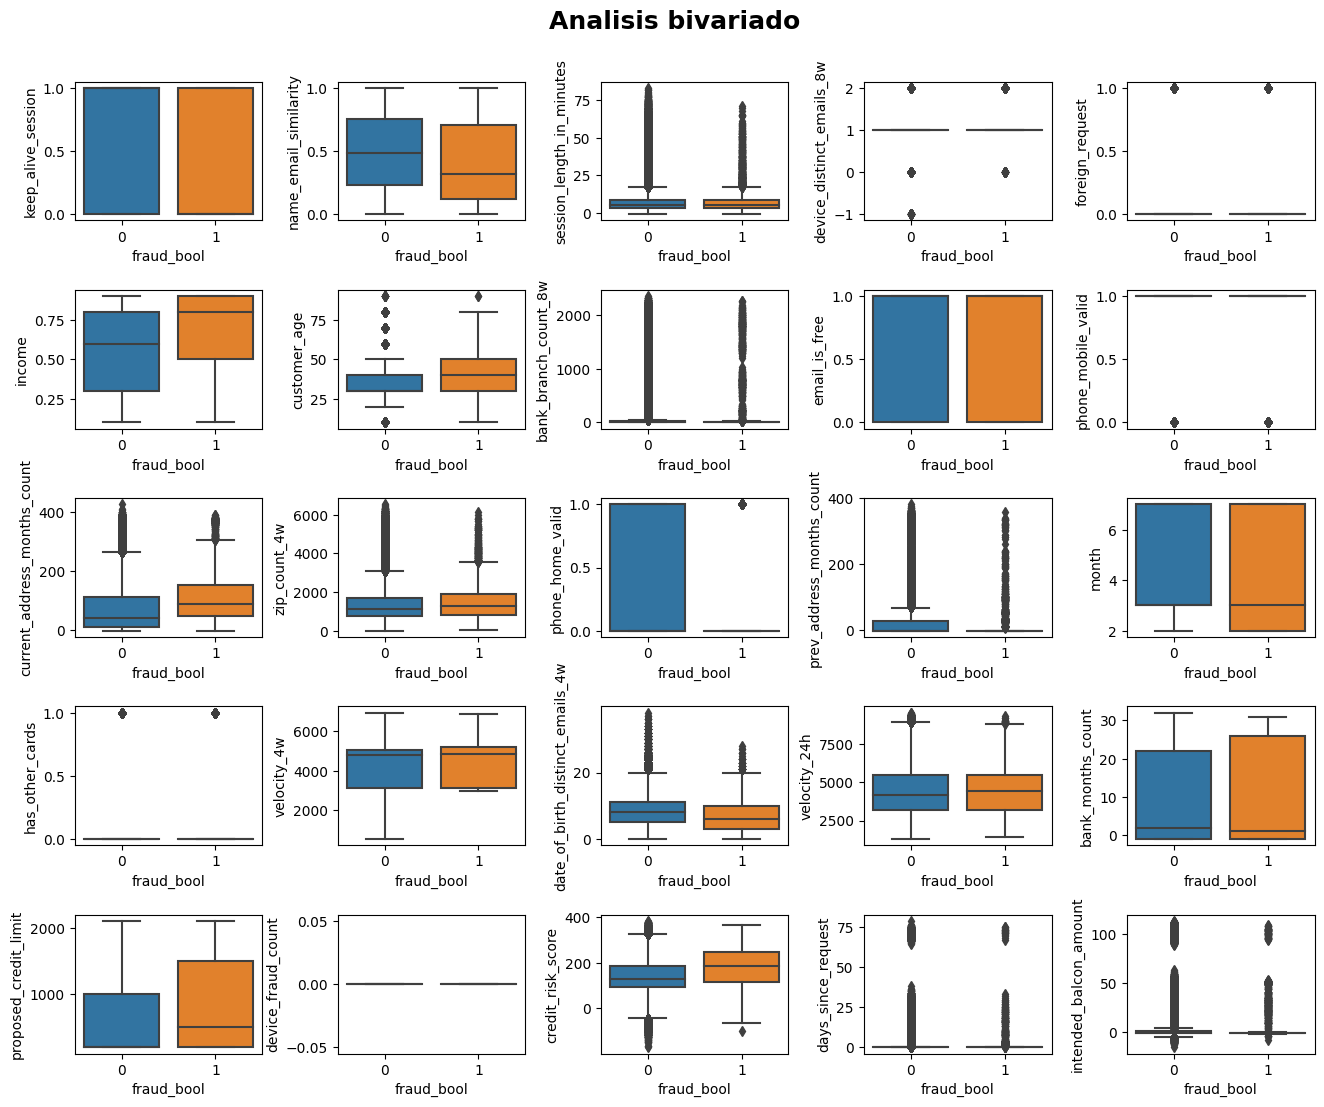

In [ ]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Analisis bivariado', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numericColumns[0:25]):
    a = fig.add_subplot(5, 5, i+1)
    a=sns.boxplot(x = 'fraud_bool' , y =col , ax=a  , data = df )

Los datos numericos mas relevantes, ya que presentan un menor ruido al momento de medirlos con el "fraud_bool" son:
>Credit_risk_score
<br>
>income
<br>
>phone_home_valid
<br>
>customer_age
<br>
>name_email_similarity
<br>
>proposed_credit_limit

A continuacion hago un analisis bivariado para encontrar en que variable cualitativa u categorica hay insights interesantes para por incorporar al arbol de decision:


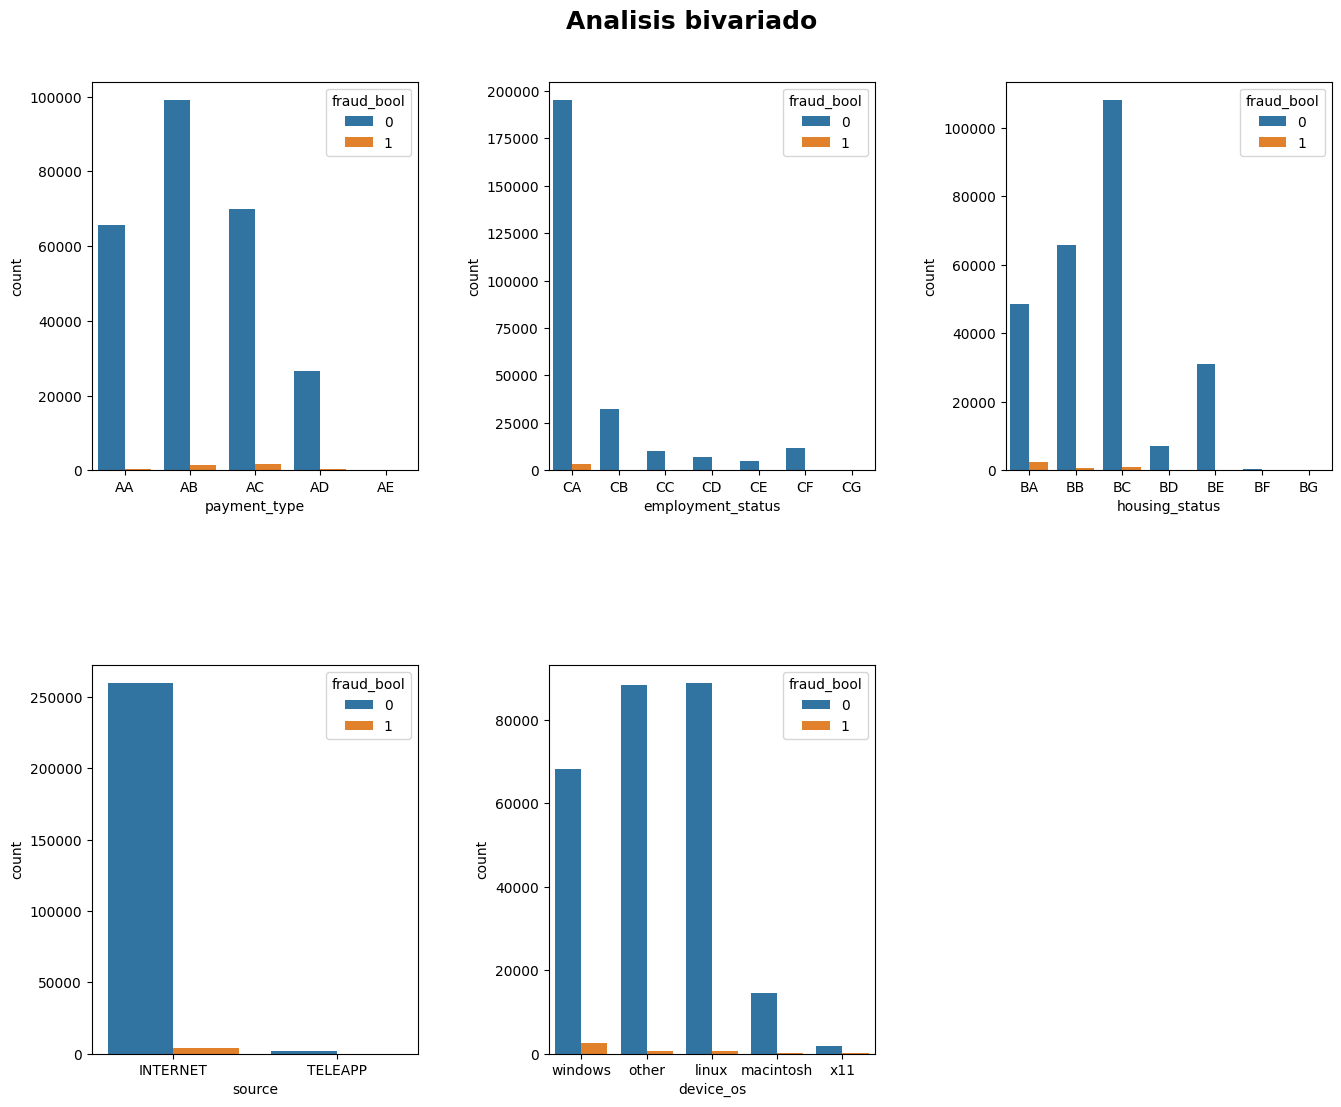

In [ ]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Analisis bivariado', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(columnCategory):
    a = fig.add_subplot(2, 3, i+1)
    a=sns.countplot(x = df[col] , ax=a , hue = df['fraud_bool'] )

Text(0, 0.5, 'Moda de edad')

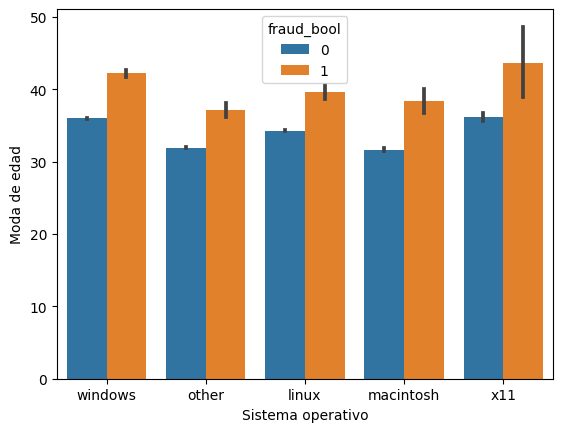

In [ ]:
sns.barplot(x='device_os', y='customer_age', hue='fraud_bool', data=df, estimator=np.mean)
sns.set(rc={'figure.figsize':(17.10,12.30)})
plt.xlabel('Sistema operativo')
plt.ylabel('Moda de edad')

Text(0, 0.5, 'Moda de scoring crediticio')

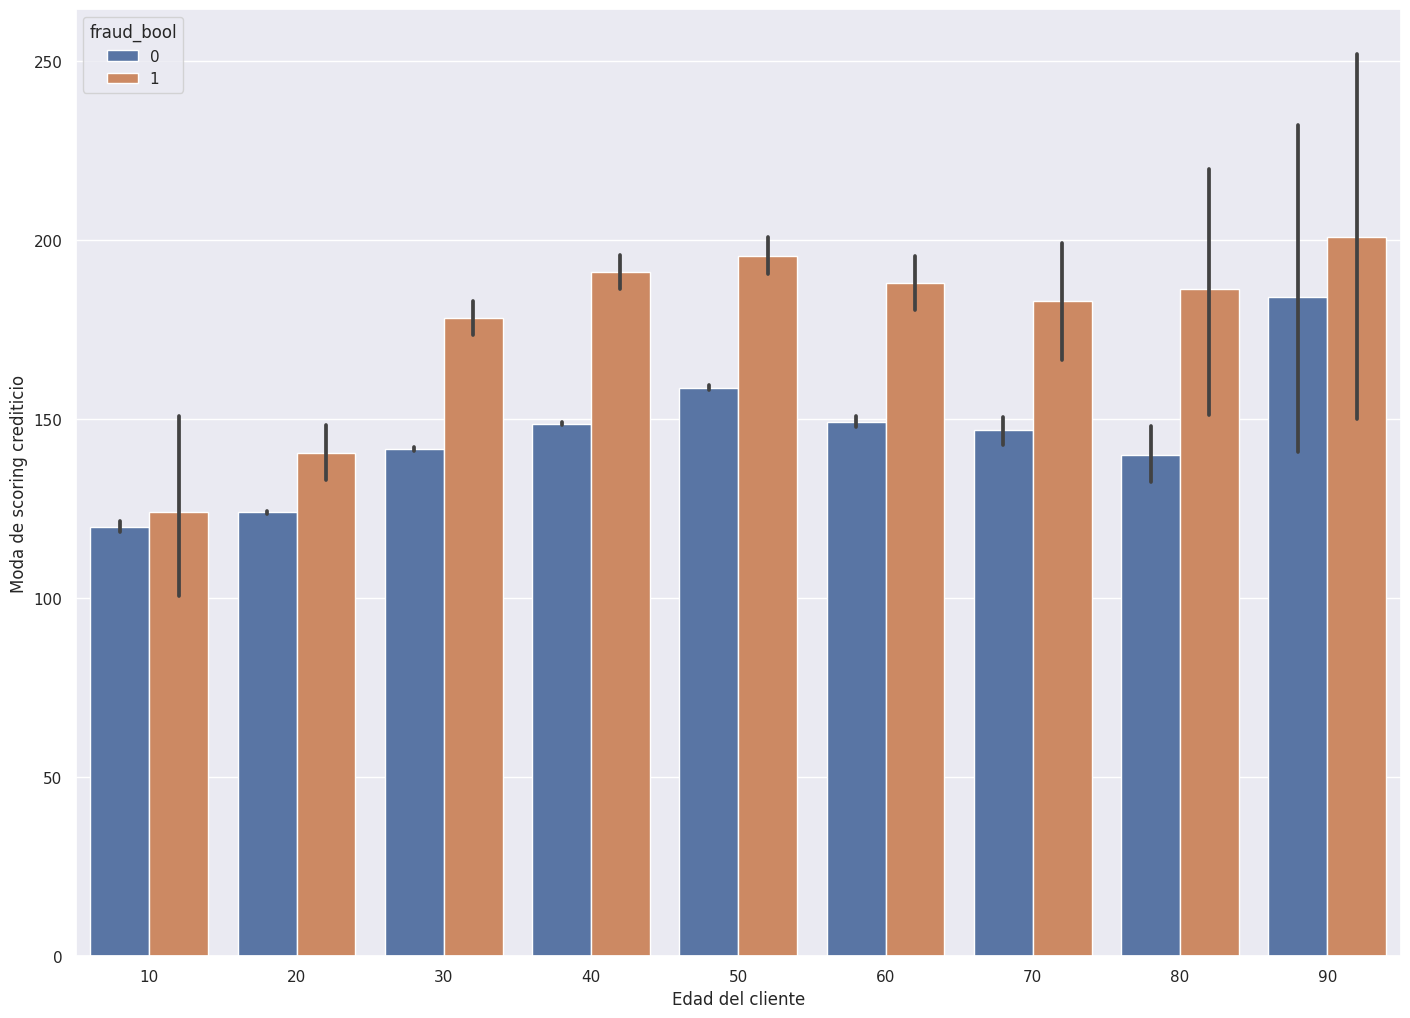

In [ ]:
sns.barplot(x="customer_age", y='credit_risk_score', hue='fraud_bool', data=df, estimator=np.mean)
plt.xlabel('Edad del cliente')
plt.ylabel('Moda de scoring crediticio')

<h3>Como hipotesis planteo:</h3>

>*las variables de Edad e Ingresos influyen en el target de la victima, ya que a mas ingresos mayor score crediticio que habilita mayores solicitudes de prestamo automatico no-supervisado.
<br>
>*La edad de la victima influye en su uso de la tecnologia. La victima que tiene una determinada edad y un determinado ingreso, tambien tiene acceso a determinadas plataformas que pueden ser vulneradas y por las cuales se llevan a cabo las solicitudes fradulentas
<br>
>*<strong>Las victimas que registran un ingreso elevado, mayor scoring crediticio (y mayor acceso al mismo) y de la franja etaria 40/50 años son mas vulnerables a ataques de ingenieria social (EJ: phishing) por ello son en quienes mas inciden los casos de fraude.</strong> Tambien se considera una variable que influye este aspecto que quien es usuario/a de windows <font color='lightgreen'>(que presenta una interfaz mas amigable y menos segura que macintosh, OS que se desenvuelve en su propio entorno)</font> tiene una mayor proporcion de casos de fraude por un manejo mas casual del uso de un ordenador (distinto a Linux que presenta mas usuarios/as y menores casos de fraude) y por tanto mas propenso a que ingrese un malware mediante el acceso a un enlace malicioso
<br>
<h2>Resumen:</h2>

>Las solicitudes fradulentas tienen una probabilidad mucho mayor en el caso de la franja etaria de 40/50, con alto ingreso, buen scoring crediticio y cuando la solicitud fue realizada por internet


La moda de la edad del cliente y todos los sistemas operativos coincide con la franja etaria planteada

A mas edad, mayor scoring crediticio. Siendo la moda (fuera de la franja etaria 90) mas alta la de la franja etaria 50
<br>
> <font color=lightblue>Un insight interesante es que en todos los casos, la moda de la solicitud de crédito fraudulenta es mayor que la moda de la solicitud de crédito licita</font>


## Solicitud a la API de google trends sobre la tematica de Fraude crediticio

In [ ]:
#install pytrends
!pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json

import pandas as pd
import requests


from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
from requests import status_codes

from pytrends import exceptions

from urllib.parse import quote

BASE_TRENDS_URL = 'https://trends.google.com/trends'


class TrendReq(object):
    """
    Google Trends API
    """
    GET_METHOD = 'get'
    POST_METHOD = 'post'
    GENERAL_URL = f'{BASE_TRENDS_URL}/api/explore'
    INTEREST_OVER_TIME_URL = f'{BASE_TRENDS_URL}/api/widgetdata/multiline'
    MULTIRANGE_INTEREST_OVER_TIME_URL = f'{BASE_TRENDS_URL}/api/widgetdata/multirange'
    INTEREST_BY_REGION_URL = f'{BASE_TRENDS_URL}/api/widgetdata/comparedgeo'
    RELATED_QUERIES_URL = f'{BASE_TRENDS_URL}/api/widgetdata/relatedsearches'
    TRENDING_SEARCHES_URL = f'{BASE_TRENDS_URL}/hottrends/visualize/internal/data'
    TOP_CHARTS_URL = f'{BASE_TRENDS_URL}/api/topcharts'
    SUGGESTIONS_URL = f'{BASE_TRENDS_URL}/api/autocomplete/'
    CATEGORIES_URL = f'{BASE_TRENDS_URL}/api/explore/pickers/category'
    TODAY_SEARCHES_URL = f'{BASE_TRENDS_URL}/api/dailytrends'
    REALTIME_TRENDING_SEARCHES_URL = f'{BASE_TRENDS_URL}/api/realtimetrends'
    ERROR_CODES = (500, 502, 504, 429)

    def __init__(self, hl='en-US', tz=360, geo='', timeout=(2, 5), proxies='',
                 retries=0, backoff_factor=0, requests_args=None):
        """
        Initialize default values for params
        """
        # google rate limit
        self.google_rl = 'You have reached your quota limit. Please try again later.'
        self.results = None
        # set user defined options used globally
        self.tz = tz
        self.hl = hl
        self.geo = geo
        self.kw_list = list()
        self.timeout = timeout
        self.proxies = proxies  # add a proxy option
        self.retries = retries
        self.backoff_factor = backoff_factor
        self.proxy_index = 0
        self.requests_args = requests_args or {}
        self.cookies = self.GetGoogleCookie()
        # intialize widget payloads
        self.token_payload = dict()
        self.interest_over_time_widget = dict()
        self.interest_by_region_widget = dict()
        self.related_topics_widget_list = list()
        self.related_queries_widget_list = list()

        self.headers = {'accept-language': self.hl}
        self.headers.update(self.requests_args.pop('headers', {}))

    def GetGoogleCookie(self):
        """
        Gets google cookie (used for each and every proxy; once on init otherwise)
        Removes proxy from the list on proxy error
        """
        while True:
            if "proxies" in self.requests_args:
                try:
                    return dict(filter(lambda i: i[0] == 'NID', requests.post(
                        f'{BASE_TRENDS_URL}/?geo={self.hl[-2:]}',
                        timeout=self.timeout,
                        **self.requests_args
                    ).cookies.items()))
                except:
                    continue
            else:
                if len(self.proxies) > 0:
                    proxy = {'https': self.proxies[self.proxy_index]}
                else:
                    proxy = ''
                try:
                    return dict(filter(lambda i: i[0] == 'NID', requests.post(
                        f'{BASE_TRENDS_URL}/?geo={self.hl[-2:]}',
                        timeout=self.timeout,
                        proxies=proxy,
                        **self.requests_args
                    ).cookies.items()))
                except requests.exceptions.ProxyError:
                    print('Proxy error. Changing IP')
                    if len(self.proxies) > 1:
                        self.proxies.remove(self.proxies[self.proxy_index])
                    else:
                        print('No more proxies available. Bye!')
                        raise
                    continue

    def GetNewProxy(self):
        """
        Increment proxy INDEX; zero on overflow
        """
        if self.proxy_index < (len(self.proxies) - 1):
            self.proxy_index += 1
        else:
            self.proxy_index = 0

    def _get_data(self, url, method=GET_METHOD, trim_chars=0, **kwargs):
        """Send a request to Google and return the JSON response as a Python object
        :param url: the url to which the request will be sent
        :param method: the HTTP method ('get' or 'post')
        :param trim_chars: how many characters should be trimmed off the beginning of the content of the response
            before this is passed to the JSON parser
        :param kwargs: any extra key arguments passed to the request builder (usually query parameters or data)
        :return:
        """
        s = requests.session()
        # Retries mechanism. Activated when one of statements >0 (best used for proxy)
        if self.retries > 0 or self.backoff_factor > 0:
            retry = Retry(total=self.retries, read=self.retries,
                          connect=self.retries,
                          backoff_factor=self.backoff_factor,
                          status_forcelist=TrendReq.ERROR_CODES,
                          allowed_methods=frozenset(['GET', 'POST']))
            s.mount('https://', HTTPAdapter(max_retries=retry))

        s.headers.update(self.headers)
        if len(self.proxies) > 0:
            self.cookies = self.GetGoogleCookie()
            s.proxies.update({'https': self.proxies[self.proxy_index]})
        if method == TrendReq.POST_METHOD:
            response = s.post(url, timeout=self.timeout,
                              cookies=self.cookies, **kwargs,
                              **self.requests_args)  # DO NOT USE retries or backoff_factor here
        else:
            response = s.get(url, timeout=self.timeout, cookies=self.cookies,
                             **kwargs, **self.requests_args)  # DO NOT USE retries or backoff_factor here
        # check if the response contains json and throw an exception otherwise
        # Google mostly sends 'application/json' in the Content-Type header,
        # but occasionally it sends 'application/javascript
        # and sometimes even 'text/javascript
        if response.status_code == 200 and 'application/json' in \
                response.headers['Content-Type'] or \
                'application/javascript' in response.headers['Content-Type'] or \
                'text/javascript' in response.headers['Content-Type']:
            # trim initial characters
            # some responses start with garbage characters, like ")]}',"
            # these have to be cleaned before being passed to the json parser
            content = response.text[trim_chars:]
            # parse json
            self.GetNewProxy()
            return json.loads(content)
        else:
            if response.status_code == status_codes.codes.too_many_requests:
                raise exceptions.TooManyRequestsError.from_response(response)
            raise exceptions.ResponseError.from_response(response)

    def build_payload(self, kw_list, cat=0, timeframe='today 5-y', geo='',
                      gprop=''):
        """Create the payload for related queries, interest over time and interest by region"""
        if gprop not in ['', 'images', 'news', 'youtube', 'froogle']:
            raise ValueError('gprop must be empty (to indicate web), images, news, youtube, or froogle')
        self.kw_list = kw_list
        self.geo = geo or self.geo
        self.token_payload = {
            'hl': self.hl,
            'tz': self.tz,
            'req': {'comparisonItem': [], 'category': cat, 'property': gprop}
        }

        # Check if timeframe is a list
        if isinstance(timeframe, list):
            for index, kw in enumerate(self.kw_list):
                keyword_payload = {'keyword': kw, 'time': timeframe[index], 'geo': self.geo}
                self.token_payload['req']['comparisonItem'].append(keyword_payload)
        else:
            # build out json for each keyword with
            for kw in self.kw_list:
                keyword_payload = {'keyword': kw, 'time': timeframe, 'geo': self.geo}
                self.token_payload['req']['comparisonItem'].append(keyword_payload)

        # requests will mangle this if it is not a string
        self.token_payload['req'] = json.dumps(self.token_payload['req'])
        # get tokens
        self._tokens()
        return

    def _tokens(self):
        """Makes request to Google to get API tokens for interest over time, interest by region and related queries"""
        # make the request and parse the returned json
        widget_dicts = self._get_data(
            url=TrendReq.GENERAL_URL,
            method=TrendReq.GET_METHOD,
            params=self.token_payload,
            trim_chars=4,
        )['widgets']
        # order of the json matters...
        first_region_token = True
        # clear self.related_queries_widget_list and self.related_topics_widget_list
        # of old keywords'widgets
        self.related_queries_widget_list[:] = []
        self.related_topics_widget_list[:] = []
        # assign requests
        for widget in widget_dicts:
            if widget['id'] == 'TIMESERIES':
                self.interest_over_time_widget = widget
            if widget['id'] == 'GEO_MAP' and first_region_token:
                self.interest_by_region_widget = widget
                first_region_token = False
            # response for each term, put into a list
            if 'RELATED_TOPICS' in widget['id']:
                self.related_topics_widget_list.append(widget)
            if 'RELATED_QUERIES' in widget['id']:
                self.related_queries_widget_list.append(widget)
        return

    def interest_over_time(self):
        """Request data from Google's Interest Over Time section and return a dataframe"""

        over_time_payload = {
            # convert to string as requests will mangle
            'req': json.dumps(self.interest_over_time_widget['request']),
            'token': self.interest_over_time_widget['token'],
            'tz': self.tz
        }

        # make the request and parse the returned json
        req_json = self._get_data(
            url=TrendReq.INTEREST_OVER_TIME_URL,
            method=TrendReq.GET_METHOD,
            trim_chars=5,
            params=over_time_payload,
        )

        df = pd.DataFrame(req_json['default']['timelineData'])
        if (df.empty):
            return df

        df['date'] = pd.to_datetime(df['time'].astype(dtype='float64'),
                                    unit='s')
        df = df.set_index(['date']).sort_index()
        # split list columns into seperate ones, remove brackets and split on comma
        result_df = df['value'].apply(lambda x: pd.Series(
            str(x).replace('[', '').replace(']', '').split(',')))
        # rename each column with its search term, relying on order that google provides...
        for idx, kw in enumerate(self.kw_list):
            # there is currently a bug with assigning columns that may be
            # parsed as a date in pandas: use explicit insert column method
            result_df.insert(len(result_df.columns), kw,
                             result_df[idx].astype('int'))
            del result_df[idx]

        if 'isPartial' in df:
            # make other dataframe from isPartial key data
            # split list columns into seperate ones, remove brackets and split on comma
            df = df.fillna(False)
            result_df2 = df['isPartial'].apply(lambda x: pd.Series(
                str(x).replace('[', '').replace(']', '').split(',')))
            result_df2.columns = ['isPartial']
            # Change to a bool type.
            result_df2.isPartial = result_df2.isPartial == 'True'
            # concatenate the two dataframes
            final = pd.concat([result_df, result_df2], axis=1)
        else:
            final = result_df
            final['isPartial'] = False

        return final

    def multirange_interest_over_time(self):
        """Request data from Google's Interest Over Time section across different time ranges and return a dataframe"""

        over_time_payload = {
            # convert to string as requests will mangle
            'req': json.dumps(self.interest_over_time_widget['request']),
            'token': self.interest_over_time_widget['token'],
            'tz': self.tz
        }

        # make the request and parse the returned json
        req_json = self._get_data(
            url=TrendReq.MULTIRANGE_INTEREST_OVER_TIME_URL,
            method=TrendReq.GET_METHOD,
            trim_chars=5,
            params=over_time_payload,
        )

        df = pd.DataFrame(req_json['default']['timelineData'])
        if (df.empty):
            return df

        result_df = pd.json_normalize(df['columnData'])

        # Split dictionary columns into seperate ones
        for i, column in enumerate(result_df.columns):
            result_df["[" + str(i) + "] " + str(self.kw_list[i]) + " date"] = result_df[i].apply(pd.Series)["formattedTime"]
            result_df["[" + str(i) + "] " + str(self.kw_list[i]) + " value"] = result_df[i].apply(pd.Series)["value"]
            result_df = result_df.drop([i], axis=1)

        # Adds a row with the averages at the top of the dataframe
        avg_row = {}
        for i, avg in enumerate(req_json['default']['averages']):
            avg_row["[" + str(i) + "] " + str(self.kw_list[i]) + " date"] = "Average"
            avg_row["[" + str(i) + "] " + str(self.kw_list[i]) + " value"] = req_json['default']['averages'][i]

        result_df.loc[-1] = avg_row
        result_df.index = result_df.index + 1
        result_df = result_df.sort_index()

        return result_df


    def interest_by_region(self, resolution='COUNTRY', inc_low_vol=False,
                           inc_geo_code=False):
        """Request data from Google's Interest by Region section and return a dataframe"""

        # make the request
        region_payload = dict()
        if self.geo == '':
            self.interest_by_region_widget['request'][
                'resolution'] = resolution
        elif self.geo == 'US' and resolution in ['DMA', 'CITY', 'REGION']:
            self.interest_by_region_widget['request'][
                'resolution'] = resolution

        self.interest_by_region_widget['request'][
            'includeLowSearchVolumeGeos'] = inc_low_vol

        # convert to string as requests will mangle
        region_payload['req'] = json.dumps(
            self.interest_by_region_widget['request'])
        region_payload['token'] = self.interest_by_region_widget['token']
        region_payload['tz'] = self.tz

        # parse returned json
        req_json = self._get_data(
            url=TrendReq.INTEREST_BY_REGION_URL,
            method=TrendReq.GET_METHOD,
            trim_chars=5,
            params=region_payload,
        )
        df = pd.DataFrame(req_json['default']['geoMapData'])
        if (df.empty):
            return df

        # rename the column with the search keyword
        geo_column = 'geoCode' if 'geoCode' in df.columns else 'coordinates'
        columns = ['geoName', geo_column, 'value']
        df = df[columns].set_index(['geoName']).sort_index()
        # split list columns into separate ones, remove brackets and split on comma
        result_df = df['value'].apply(lambda x: pd.Series(
            str(x).replace('[', '').replace(']', '').split(',')))
        if inc_geo_code:
            if geo_column in df.columns:
                result_df[geo_column] = df[geo_column]
            else:
                print('Could not find geo_code column; Skipping')

        # rename each column with its search term
        for idx, kw in enumerate(self.kw_list):
            result_df[kw] = result_df[idx].astype('int')
            del result_df[idx]

        return result_df

    def related_topics(self):
        """Request data from Google's Related Topics section and return a dictionary of dataframes
        If no top and/or rising related topics are found, the value for the key "top" and/or "rising" will be None
        """

        # make the request
        related_payload = dict()
        result_dict = dict()
        for request_json in self.related_topics_widget_list:
            # ensure we know which keyword we are looking at rather than relying on order
            try:
                kw = request_json['request']['restriction'][
                    'complexKeywordsRestriction']['keyword'][0]['value']
            except KeyError:
                kw = ''
            # convert to string as requests will mangle
            related_payload['req'] = json.dumps(request_json['request'])
            related_payload['token'] = request_json['token']
            related_payload['tz'] = self.tz

            # parse the returned json
            req_json = self._get_data(
                url=TrendReq.RELATED_QUERIES_URL,
                method=TrendReq.GET_METHOD,
                trim_chars=5,
                params=related_payload,
            )

            # top topics
            try:
                top_list = req_json['default']['rankedList'][0]['rankedKeyword']
                df_top = pd.json_normalize(top_list, sep='_')
            except KeyError:
                # in case no top topics are found, the lines above will throw a KeyError
                df_top = None

            # rising topics
            try:
                rising_list = req_json['default']['rankedList'][1]['rankedKeyword']
                df_rising = pd.json_normalize(rising_list, sep='_')
            except KeyError:
                # in case no rising topics are found, the lines above will throw a KeyError
                df_rising = None

            result_dict[kw] = {'rising': df_rising, 'top': df_top}
        return result_dict

    def related_queries(self):
        """Request data from Google's Related Queries section and return a dictionary of dataframes
        If no top and/or rising related queries are found, the value for the key "top" and/or "rising" will be None
        """

        # make the request
        related_payload = dict()
        result_dict = dict()
        for request_json in self.related_queries_widget_list:
            # ensure we know which keyword we are looking at rather than relying on order
            try:
                kw = request_json['request']['restriction'][
                    'complexKeywordsRestriction']['keyword'][0]['value']
            except KeyError:
                kw = ''
            # convert to string as requests will mangle
            related_payload['req'] = json.dumps(request_json['request'])
            related_payload['token'] = request_json['token']
            related_payload['tz'] = self.tz

            # parse the returned json
            req_json = self._get_data(
                url=TrendReq.RELATED_QUERIES_URL,
                method=TrendReq.GET_METHOD,
                trim_chars=5,
                params=related_payload,
            )

            # top queries
            try:
                top_df = pd.DataFrame(
                    req_json['default']['rankedList'][0]['rankedKeyword'])
                top_df = top_df[['query', 'value']]
            except KeyError:
                # in case no top queries are found, the lines above will throw a KeyError
                top_df = None

            # rising queries
            try:
                rising_df = pd.DataFrame(
                    req_json['default']['rankedList'][1]['rankedKeyword'])
                rising_df = rising_df[['query', 'value']]
            except KeyError:
                # in case no rising queries are found, the lines above will throw a KeyError
                rising_df = None

            result_dict[kw] = {'top': top_df, 'rising': rising_df}
        return result_dict

    def trending_searches(self, pn='united_states'):
        """Request data from Google's Hot Searches section and return a dataframe"""

        # make the request
        # forms become obsolete due to the new TRENDING_SEARCHES_URL
        # forms = {'ajax': 1, 'pn': pn, 'htd': '', 'htv': 'l'}
        req_json = self._get_data(
            url=TrendReq.TRENDING_SEARCHES_URL,
            method=TrendReq.GET_METHOD
        )[pn]
        result_df = pd.DataFrame(req_json)
        return result_df

    def today_searches(self, pn='US'):
        """Request data from Google Daily Trends section and returns a dataframe"""
        forms = {'ns': 15, 'geo': pn, 'tz': '-180', 'hl': 'en-US'}
        req_json = self._get_data(
            url=TrendReq.TODAY_SEARCHES_URL,
            method=TrendReq.GET_METHOD,
            trim_chars=5,
            params=forms,
            **self.requests_args
        )['default']['trendingSearchesDays'][0]['trendingSearches']
        # parse the returned json
        result_df = pd.DataFrame(trend['title'] for trend in req_json)
        return result_df.iloc[:, -1]

    def realtime_trending_searches(self, pn='US', cat='all', count =300):
        """Request data from Google Realtime Search Trends section and returns a dataframe"""
        # Don't know what some of the params mean here, followed the nodejs library
        # https://github.com/pat310/google-trends-api/ 's implemenration


        #sort: api accepts only 0 as the value, optional parameter

        # ri: number of trending stories IDs returned,
        # max value of ri supported is 300, based on emperical evidence

        ri_value = 300
        if count < ri_value:
            ri_value = count

        # rs : don't know what is does but it's max value is never more than the ri_value based on emperical evidence
        # max value of ri supported is 200, based on emperical evidence
        rs_value = 200
        if count < rs_value:
            rs_value = count-1

        forms = {'ns': 15, 'geo': pn, 'tz': '300', 'hl': 'en-US', 'cat': cat, 'fi' : '0', 'fs' : '0', 'ri' : ri_value, 'rs' : rs_value, 'sort' : 0}
        req_json = self._get_data(
            url=TrendReq.REALTIME_TRENDING_SEARCHES_URL,
            method=TrendReq.GET_METHOD,
            trim_chars=5,
            params=forms
        )['storySummaries']['trendingStories']

        # parse the returned json
        wanted_keys = ["entityNames", "title"]

        final_json = [{ key: ts[key] for key in ts.keys() if key in wanted_keys} for ts in req_json ]

        result_df = pd.DataFrame(final_json)

        return result_df

    def top_charts(self, date, hl='en-US', tz=300, geo='GLOBAL'):
        """Request data from Google's Top Charts section and return a dataframe"""

        try:
            date = int(date)
        except:
            raise ValueError(
                'The date must be a year with format YYYY. See https://github.com/GeneralMills/pytrends/issues/355')

        # create the payload
        chart_payload = {'hl': hl, 'tz': tz, 'date': date, 'geo': geo,
                         'isMobile': False}

        # make the request and parse the returned json
        req_json = self._get_data(
            url=TrendReq.TOP_CHARTS_URL,
            method=TrendReq.GET_METHOD,
            trim_chars=5,
            params=chart_payload
        )
        try:
            df = pd.DataFrame(req_json['topCharts'][0]['listItems'])
        except IndexError:
            df = None
        return df

    def suggestions(self, keyword):
        """Request data from Google's Keyword Suggestion dropdown and return a dictionary"""

        # make the request
        kw_param = quote(keyword)
        parameters = {'hl': self.hl}

        req_json = self._get_data(
            url=TrendReq.SUGGESTIONS_URL + kw_param,
            params=parameters,
            method=TrendReq.GET_METHOD,
            trim_chars=5
        )['default']['topics']
        return req_json

    def categories(self):
        """Request available categories data from Google's API and return a dictionary"""

        params = {'hl': self.hl}

        req_json = self._get_data(
            url=TrendReq.CATEGORIES_URL,
            params=params,
            method=TrendReq.GET_METHOD,
            trim_chars=5
        )
        return req_json

    def get_historical_interest(self, *args, **kwargs):
        raise NotImplementedError(
            """This method has been removed for incorrectness. It will be removed completely in v5.
If you'd like similar functionality, please try implementing it yourself and consider submitting a pull request to add it to pytrends.

There is discussion at:
https://github.com/GeneralMills/pytrends/pull/542"""
        )


In [ ]:
!pip show pytrends

Name: pytrends
Version: 4.9.2
Summary: Pseudo API for Google Trends
Home-page: 
Author: John Hogue, Burton DeWilde
Author-email: dreyco676@gmail.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: lxml, pandas, requests
Required-by: 


Query

In [ ]:
ptr = TrendReq(hl='en-AU',retries=3, backoff_factor=20)
kw_list = ["Credit Fraud","Bank Phishing","Credit Card Fraud","Credit Phishing"]
ptr.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='US', gprop='')
#pd = ptr.interest_over_time()
#pd.reset_index(inplace = True)
#df = pd[['uber']]
#df.columns = ['Week','Uber']

In [ ]:
fraudTrends=ptr.interest_by_region()
fraudTrends

Credit Fraud  Bank Phishing  Credit Card Fraud  \
geoName                                                                
Alabama                         67              0                 33   
Alaska                         100              0                  0   
Arizona                         66              0                 34   
Arkansas                        66              0                 34   
California                      64              3                 32   
Colorado                        67              0                 33   
Connecticut                     64              0                 36   
Delaware                        66              0                 34   
District of Columbia            66              0                 34   
Florida                         65              3                 31   
Georgia                         62              3                 35   
Hawaii                          64              0                 36   
Idaho                          100              0                  0   
Illinois                        64              0                 36   
Indiana                         65              0                 35   
Iowa                            65              0                 35   
Kansas                          68              0                 32   
Kentucky                        64              0                 36   
Louisiana                       64              0                 36   
Maine                           71              0                 29   
Maryland                        65              0                 35   
Massachusetts                   62              3                 35   
Michigan                        66              0                 34   
Minnesota                       63              0                 37   
Mississippi                     65              0                 35   
Missouri                        67              0                 33   
Montana                        100              0                  0   
Nebraska                        65              0                 35   
Nevada                          65              0                 35   
New Hampshire                   68              0                 32   
New Jersey                      59              3                 38   
New Mexico                      66              0                 34   
New York                        60              2                 37   
North Carolina                  63              0                 37   
North Dakota                   100              0                  0   
Ohio                            65              0                 35   
Oklahoma                        66              0                 34   
Oregon                          67              0                 33   
Pennsylvania                    62              0                 38   
Rhode Island                    68              0                 32   
South Carolina                  66              0                 34   
South Dakota                   100              0                  0   
Tennessee                       67              0                 33   
Texas                           65              3                 30   
Utah                            69              0                 31   
Vermont                        100              0                  0   
Virginia                        61              3                 36   
Washington                      66              0                 34   
West Virginia                   66              0                 34   
Wisconsin                       68              0                 32   
Wyoming                        100              0                  0   

                      Credit Phishing  
geoName                                
Alabama                             0  
Alaska                              0  
Arizona                             0  
Arkan

In [ ]:
fraudTrends.mean()

Credit Fraud         69.960784
Bank Phishing         0.450980
Credit Card Fraud    29.490196
Credit Phishing       0.098039
dtype: float64

Notese un insight interesante. <strong>*Practicamente no hay busquedas del termino "phishing" asociado al fraude bancario o al fraude crediticio*</strong> siendo que la principal modalidad por la cual se obtienen ilegitimamente las credenciales para realizar fraude bancario o crediticio es mediante enlaces apocrifos y maliciosos donde los usuarios son engañados y sus datos robados.
Esto nos da una hipotesis: Hay una falta de concientizacion por parte de las victimas sobre como han sido estafadas o con que modalidades lo han sido

##Eleccion de variables con analisis bivariado

In [ ]:
round(df.corr()['fraud_bool'].sort_values(ascending = False)[1:] ,2 )

<ipython-input-24-6f71e326283f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(df.corr()['fraud_bool'].sort_values(ascending = False)[1:] ,2 )


proposed_credit_limit               0.08
credit_risk_score                   0.08
customer_age                        0.07
device_distinct_emails_8w           0.06
current_address_months_count        0.05
income                              0.04
email_is_free                       0.03
zip_count_4w                        0.02
foreign_request                     0.02
velocity_4w                         0.02
session_length_in_minutes           0.02
velocity_24h                        0.01
days_since_request                  0.00
bank_months_count                   0.00
velocity_6h                        -0.01
bank_branch_count_8w               -0.01
month                              -0.02
phone_mobile_valid                 -0.02
intended_balcon_amount             -0.03
prev_address_months_count          -0.03
name_email_similarity              -0.04
phone_home_valid                   -0.04
has_other_cards                    -0.05
date_of_birth_distinct_emails_4w   -0.05
keep_alive_sessi

In [ ]:
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 15}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}

<ipython-input-26-fcc6ce2fbf53>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')


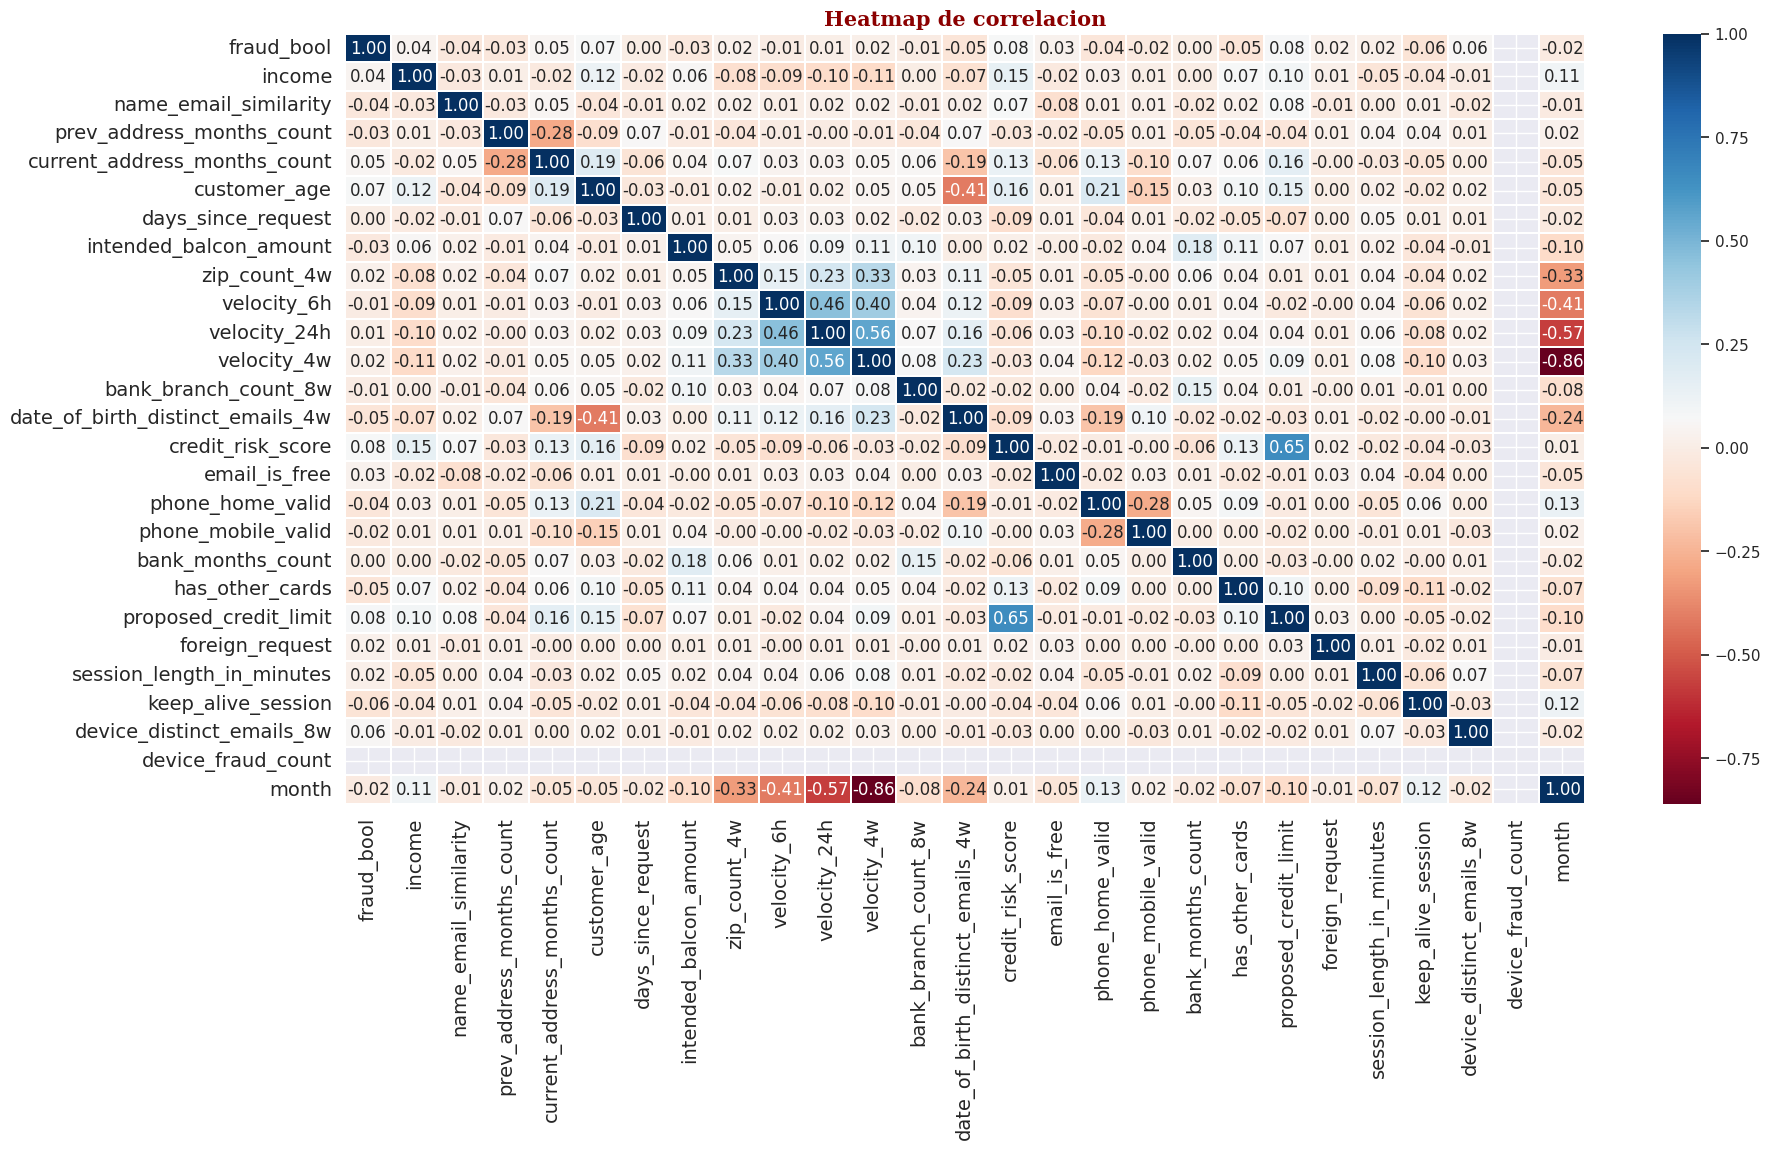

In [ ]:
fig, ax = plt.subplots(figsize=[20,10])
sns.heatmap(df.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Heatmap de correlacion', fontdict=axtitle_dict)
fig.show()

####Limite de credito y riesgo crediticio

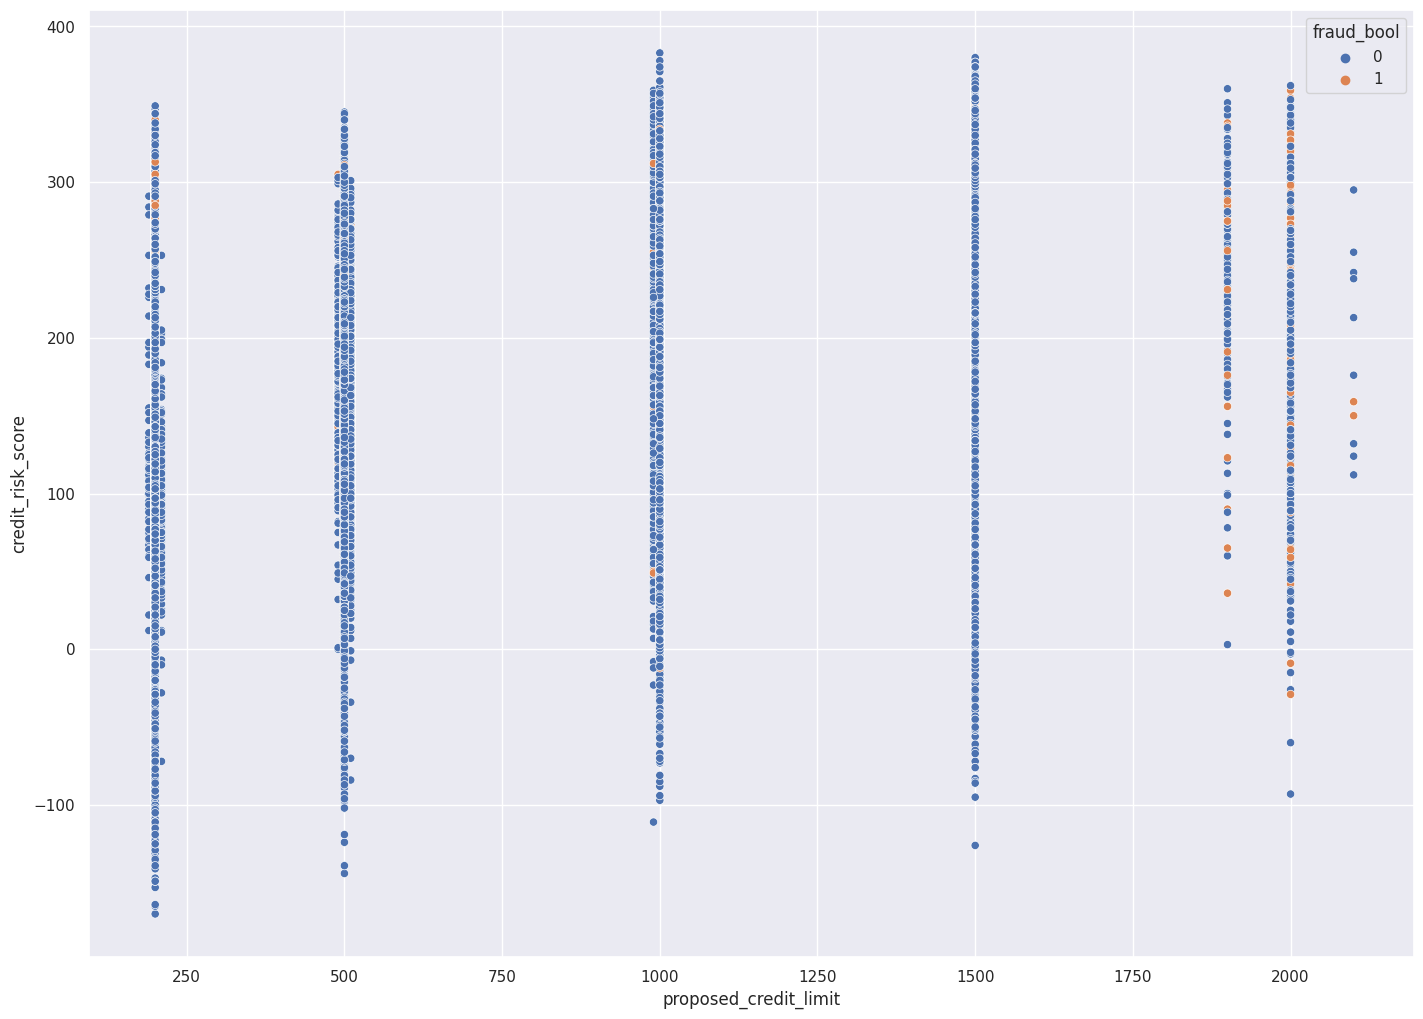

In [ ]:
sns.scatterplot(data=df, x="proposed_credit_limit", y="credit_risk_score", hue='fraud_bool')
sns.set(rc={'figure.figsize':(17.10,12.30)})

Como se aprecia en el el ultimo grafico, los datos nos muestran que:
> A un limite créditicio alto estan las mayores solicitudes de fraude
<br>
<br>
> Un mayor scoring crediticio se correlaciona con la anterior variable arrojando una mayor concentracion de los casos de fraude confirmados


In [ ]:
df[['proposed_credit_limit', 'credit_risk_score']].head(10)

proposed_credit_limit  credit_risk_score
0                  500.0              185.0
1                 1500.0              259.0
2                  200.0              177.0
3                  200.0              110.0
4                 1500.0              295.0
5                  200.0              199.0
6                 1500.0              272.0
7                  200.0               83.0
8                 1500.0              222.0
9                  200.0              118.0

Tengo una variable ordinal y otra de intervalo, por lo que se debe aplicar al coeficiente de correlacion de Spearman

In [ ]:
print(df['proposed_credit_limit'].corr(df['credit_risk_score'], method='spearman'))

0.6731848698813305


El mismo tiene una correlacion superior a 0.5 y tendiente a 0.7 por lo que podemos decir que la correlacion es significativa

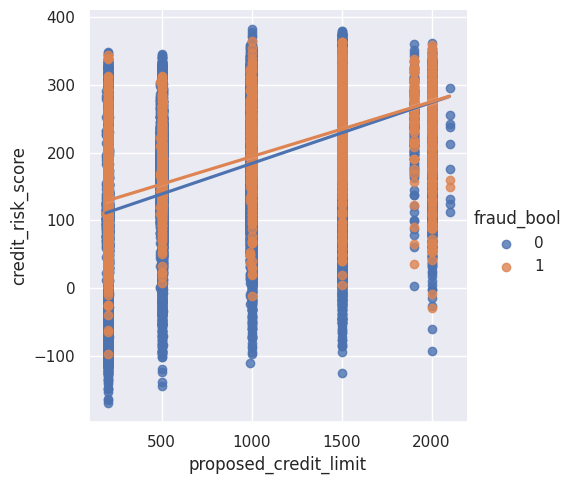

In [ ]:
from seaborn import lmplot
lmplot(x='proposed_credit_limit', y='credit_risk_score', data=df, hue='fraud_bool')

Este grafico apoya la hipotesis arriba panteada. Se ve un incremento correlacional entre crédit risk y limites créditicios

<h2>Analizando si otras variables con alta correlacion son relevantes al modelo</h2>

><font color = "red">Dado que se demuestra una correlacion alta entre Velocity_24h y _4w veremos en un grafico de scatterplot si hay un patron de clustering en los casos de fraude o si esta correlacion no esta relacionada a los casos de fraude</font>
<br>
><font color = "lightgreen">Como se aprecia en el grafico que esta debajo estas dos varaibles no impactan en los casos de fraude</font>

In [ ]:
df[["velocity_4w","velocity_24h"]].head(10)

velocity_4w  velocity_24h
0  3863.647740   3134.319630
1  3124.298166   2670.918292
2  3159.590679   2893.621498
3  3022.261812   4054.908412
4  3087.670952   2728.237159
5  5078.692467   3804.803402
6  3089.788379   2653.430035
7  3826.129170   6733.703890
8  3089.271130   3849.761426
9  3061.245889   3793.831786

Al ser dos variables de intervalo se debe usar el coeficiente de corelacion de pearson

In [ ]:
print(df["velocity_4w"].corr(df["velocity_24h"], method='pearson'))

0.5603851099267403


La correlacion no es significativa

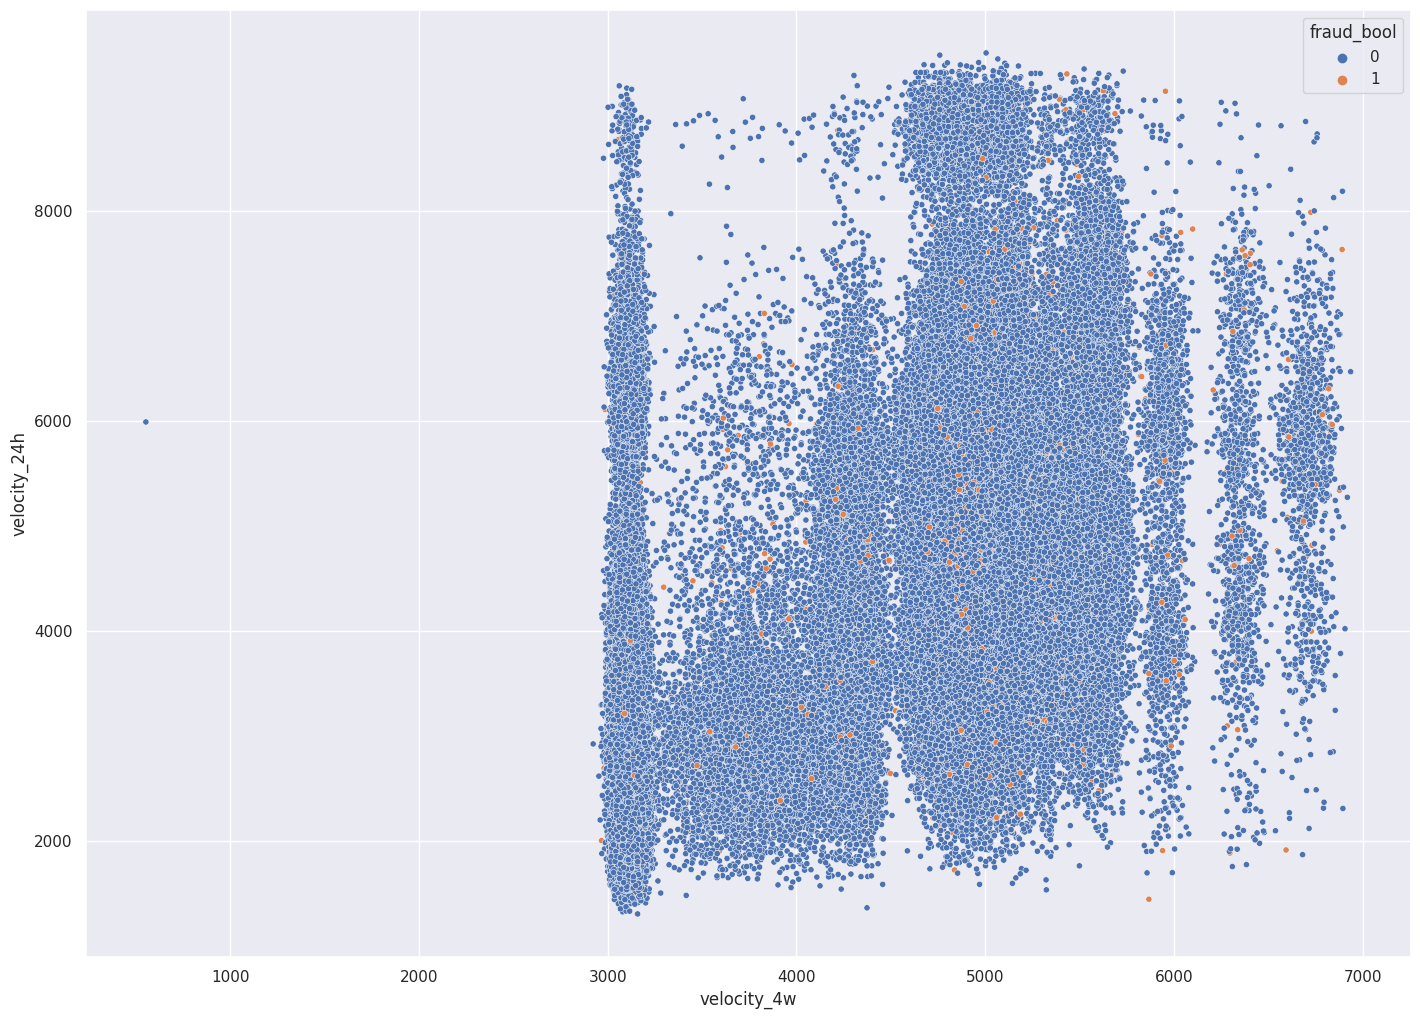

In [ ]:
sns.scatterplot(data=df, x="velocity_4w", y="velocity_24h", s=20, hue='fraud_bool')
sns.set(rc={'figure.figsize':(17.10,12.30)})

>Veremos si ocurre lo mismo con "Velocity_6h"

In [ ]:
print(df["velocity_4w"].corr(df["velocity_6h"], method='pearson'))

0.39837300403562276


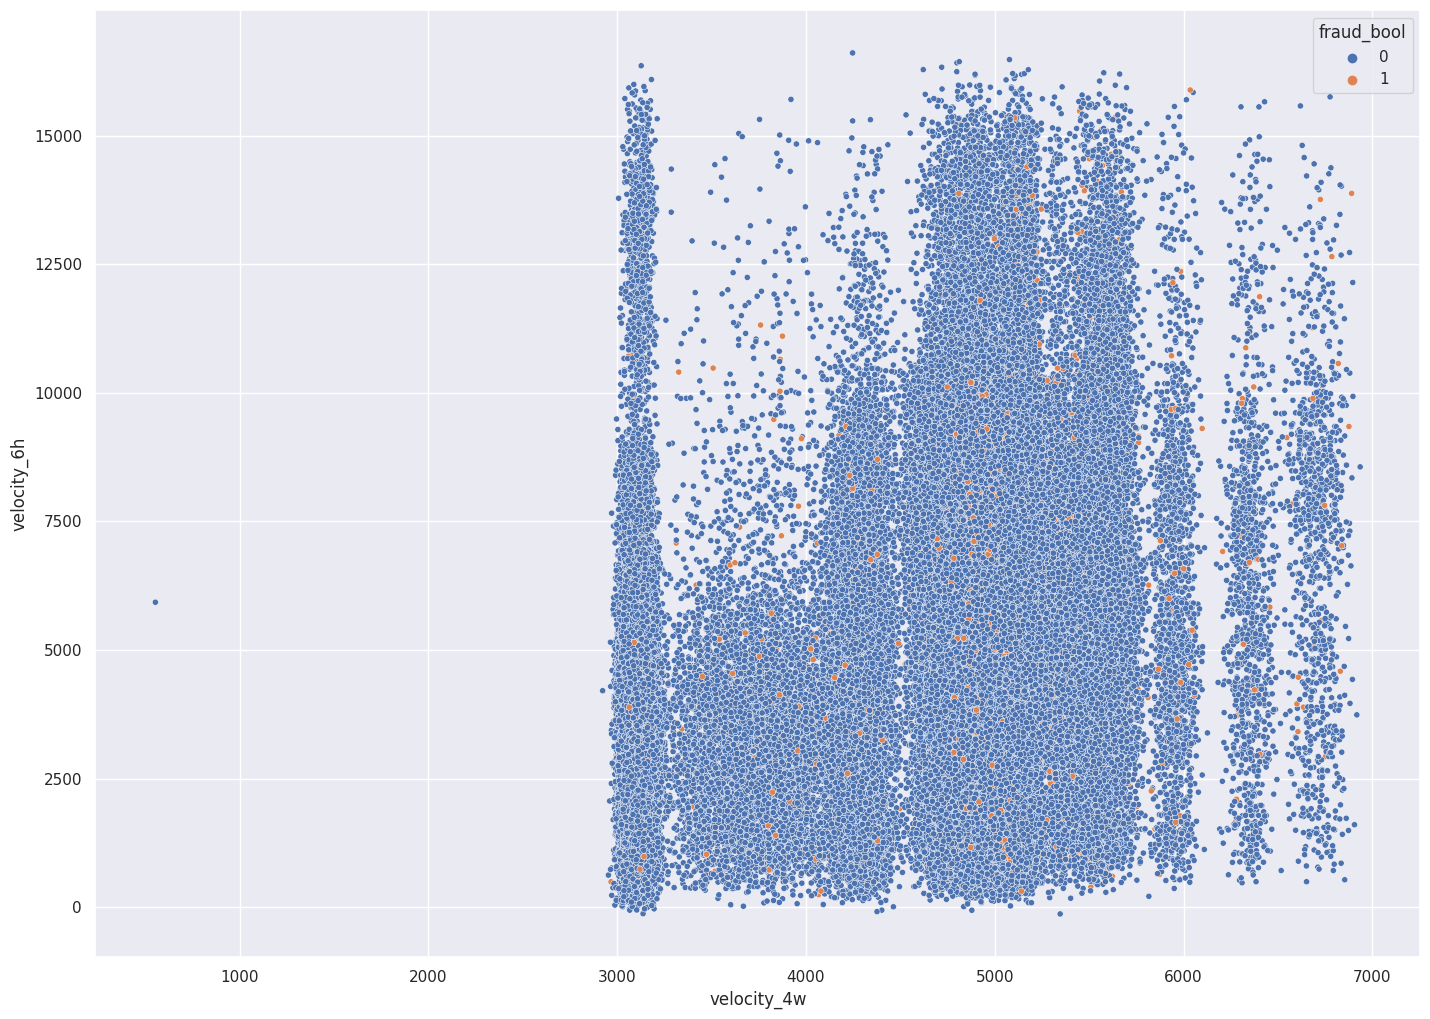

In [ ]:
sns.scatterplot(data=df, x="velocity_4w", y="velocity_6h", s=20, hue='fraud_bool')
sns.set(rc={'figure.figsize':(17.10,12.30)})

<font color="grey">Ocurre lo mismo que en el anterior ejemplo. Estas variables no tienen impacto en la problematica ni presentan rasgos que puedan aportar a la clasificacion o al clustering de los casos</font>

>"name_email_similarity" no presenta una particular correlacion con ninguna otra variable. La variable con mayor proximidad es "proposed_credit_limit" por lo que veremos si hay una correlacion con los casos de fraude

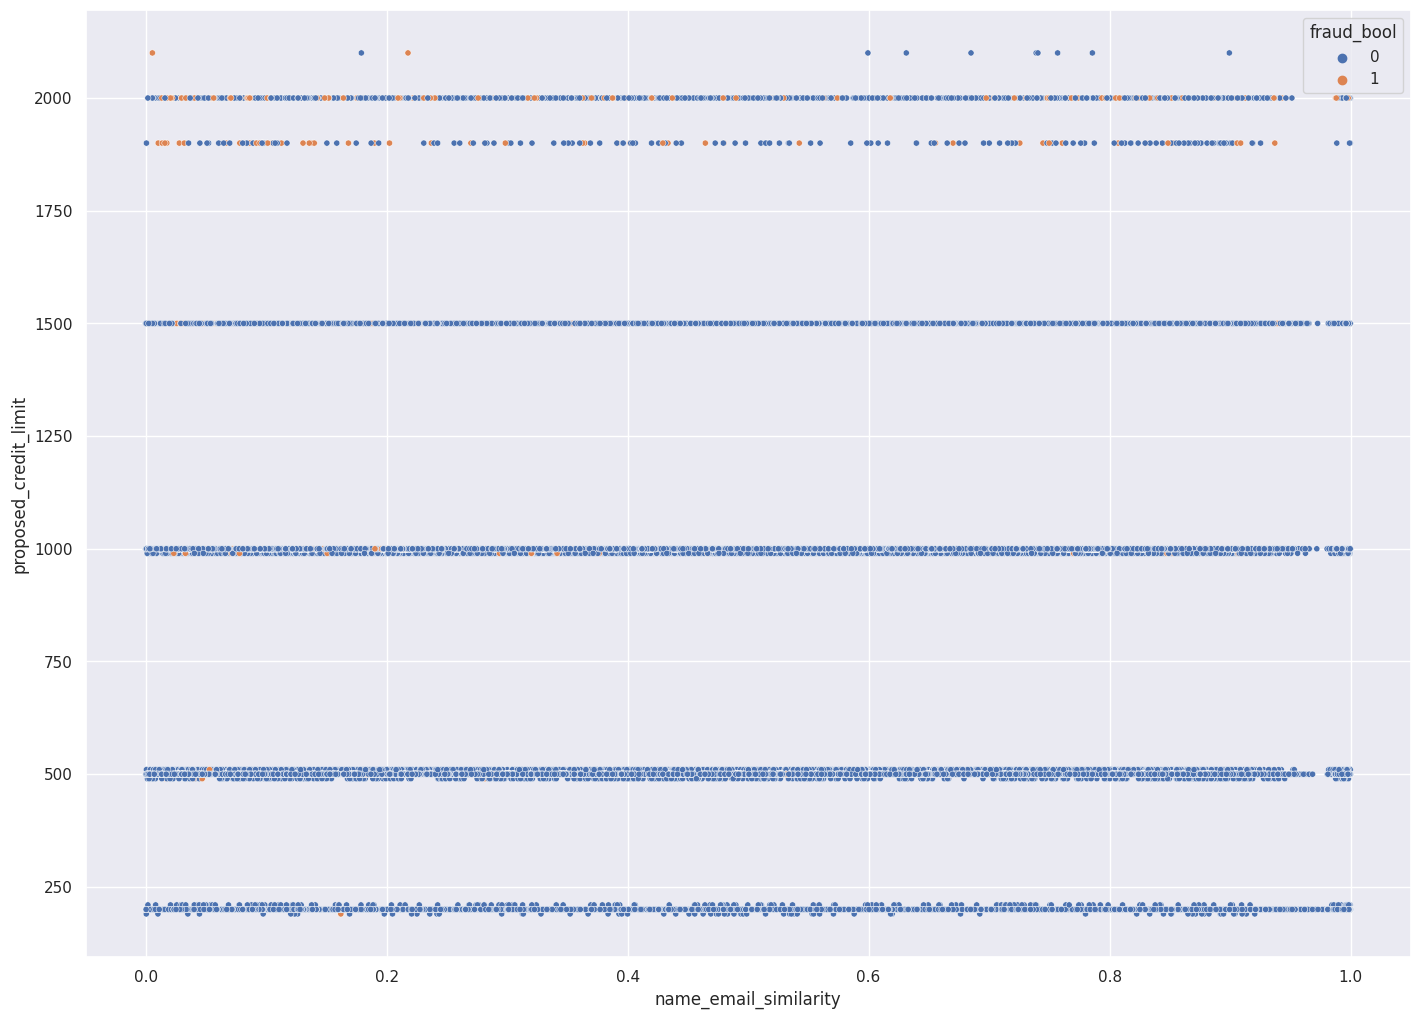

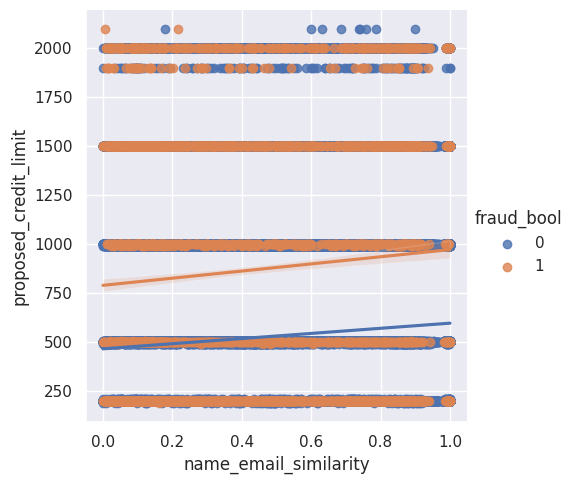

In [ ]:
sns.scatterplot(data=df, x="name_email_similarity", y="proposed_credit_limit", s=20, hue='fraud_bool')
sns.set(rc={'figure.figsize':(17.10,12.30)})
lmplot(x='name_email_similarity', y='proposed_credit_limit', data=df, hue='fraud_bool')

> No se ve una gran tendencia correlacional. Hay una leve (muy leve) inclinacion hacia arriba de la tendencia entre la similaridad del nombre del email y el limite crediticio, pero esto puede ser casual ya que la variable es es muy independiente de las demas

<h2>Como conclusiones parciales  y principales recomendaciones:</h2>

> Hay una innegable correlacion entre la edad y los casos de fraude

> Las variables continuas mas relevantes para detectar casos de fraude parecen ser: "proposed_credit_limit", "credit_risk_score" e "income"
<br>
> Las caregoricas son: 'device_os', "Source" y "Employment_status"

<font color = "lightgreen">Por este motivo devemos considerar cuales serán las recomendaciones a seguir basandonos en esta informacion</font>

> Generar un algoritmo "arbol de decision" para poder hacer un filtrado parcial de las solicitudes entrantes y asi descartar que puedan ser casos de fraude:
<br>

> Primariamente descartar en el primer control de flujo si la solicitud tiene como fuente TELEAPP <strong>"or"</strong> si el estatus de empleo no es "CA"
<br>

> Pasado este primer filtro generar un sistema de scoring que agregue un punto ("fraud_probability_bool+=1") un porcentaje al la probabilidad de fraude segun se vayan cumpliendo los condicionales "IF" del arbol
<br>

> Si la solicitud viene de un usuario con entorno operativo windows, si la solicitud supera la media de scoring crediticio segun edad, si el income del usuario supera la media etc. va sumando 1 punto al "fraud_probability_bool"
<br>

>Finalizado el arbol de decision se divide el "fraud_probability_bool" por la cantidad de operadores logicos y se saca un promedio. Si el promeido supera el 0.5 se emite un pedido de auditoria, caso contrario se aprueba la solicitud automaticamente

Esta solucion es parcial hasta ahondar en un algoritmo mas sofisticado

##Metodo de eliminacion de variables (complementario)
En el presente docuemento complementario se analiza de que forma se eliminarán las variables significativas al momento de realizar el modelo de regresion logistica. Para ello se utilizará el metodo backward eliminando las variables con el p-valor mas alto para buscar aquellas variables independientes extremas que respondan mejor a la variable de clasificacion binaria

Creo una copia y elimino las variables categoricas

In [ ]:
data = df.copy()
data=data.drop(['payment_type', 'employment_status', 'housing_status', 'source', 'device_os', 'device_fraud_count'], axis=1)

¿Que valores NaN/Negativos tengo?

In [ ]:
data.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                1
date_of_birth_distinct_emails_4w    1
credit_risk_score                   1
email_is_free                       1
phone_home_valid                    1
phone_mobile_valid                  1
bank_months_count                   1
has_other_cards                     1
proposed_credit_limit               1
foreign_request                     1
session_length_in_minutes           1
keep_alive_session                  1
device_distinct_emails_8w           1
month                               1
dtype: int64

Que densidad de missing values hay en la dataframe?

<Axes: >

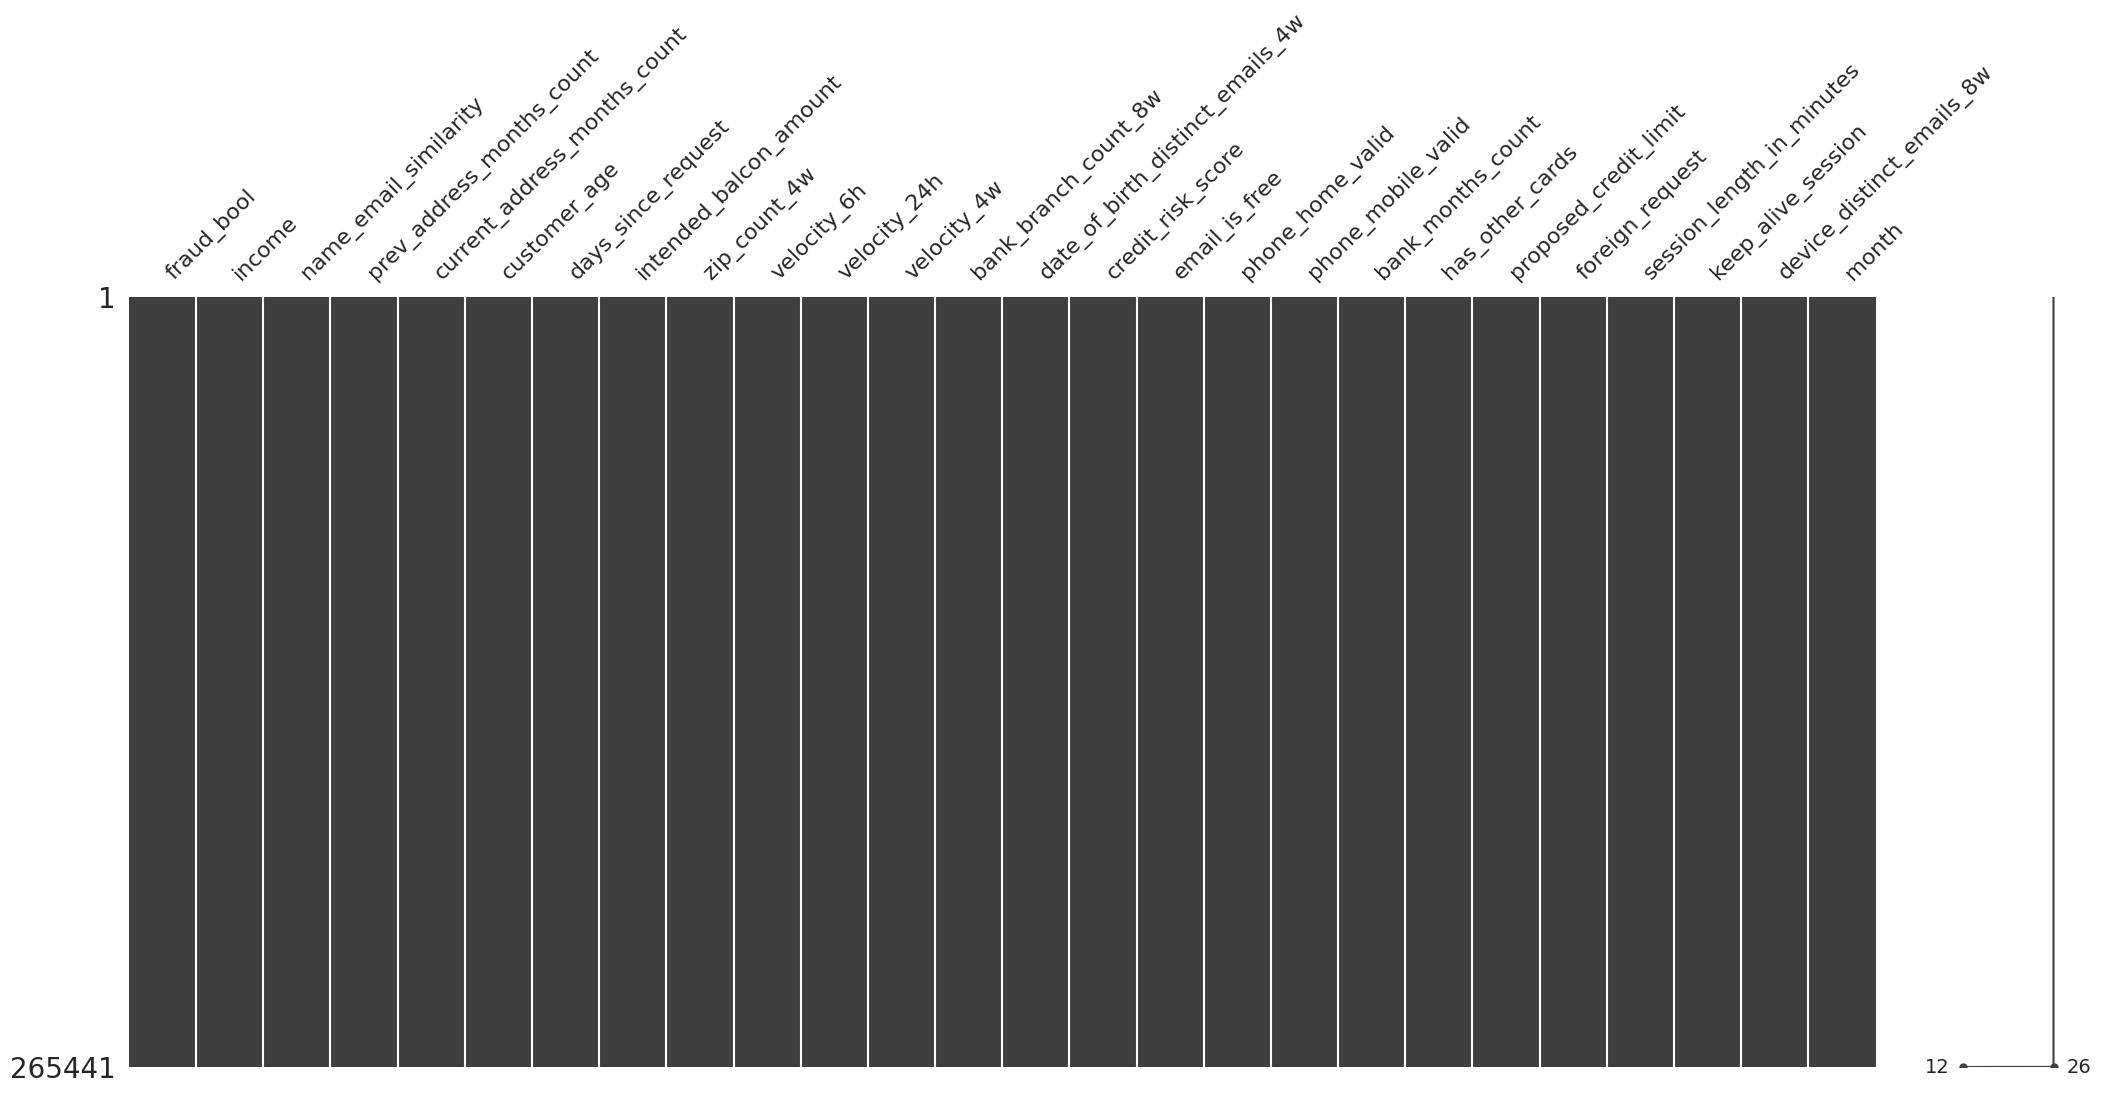

In [ ]:
import missingno as msno
msno.matrix(data)

Y a continuacion la densidad de valores negativos

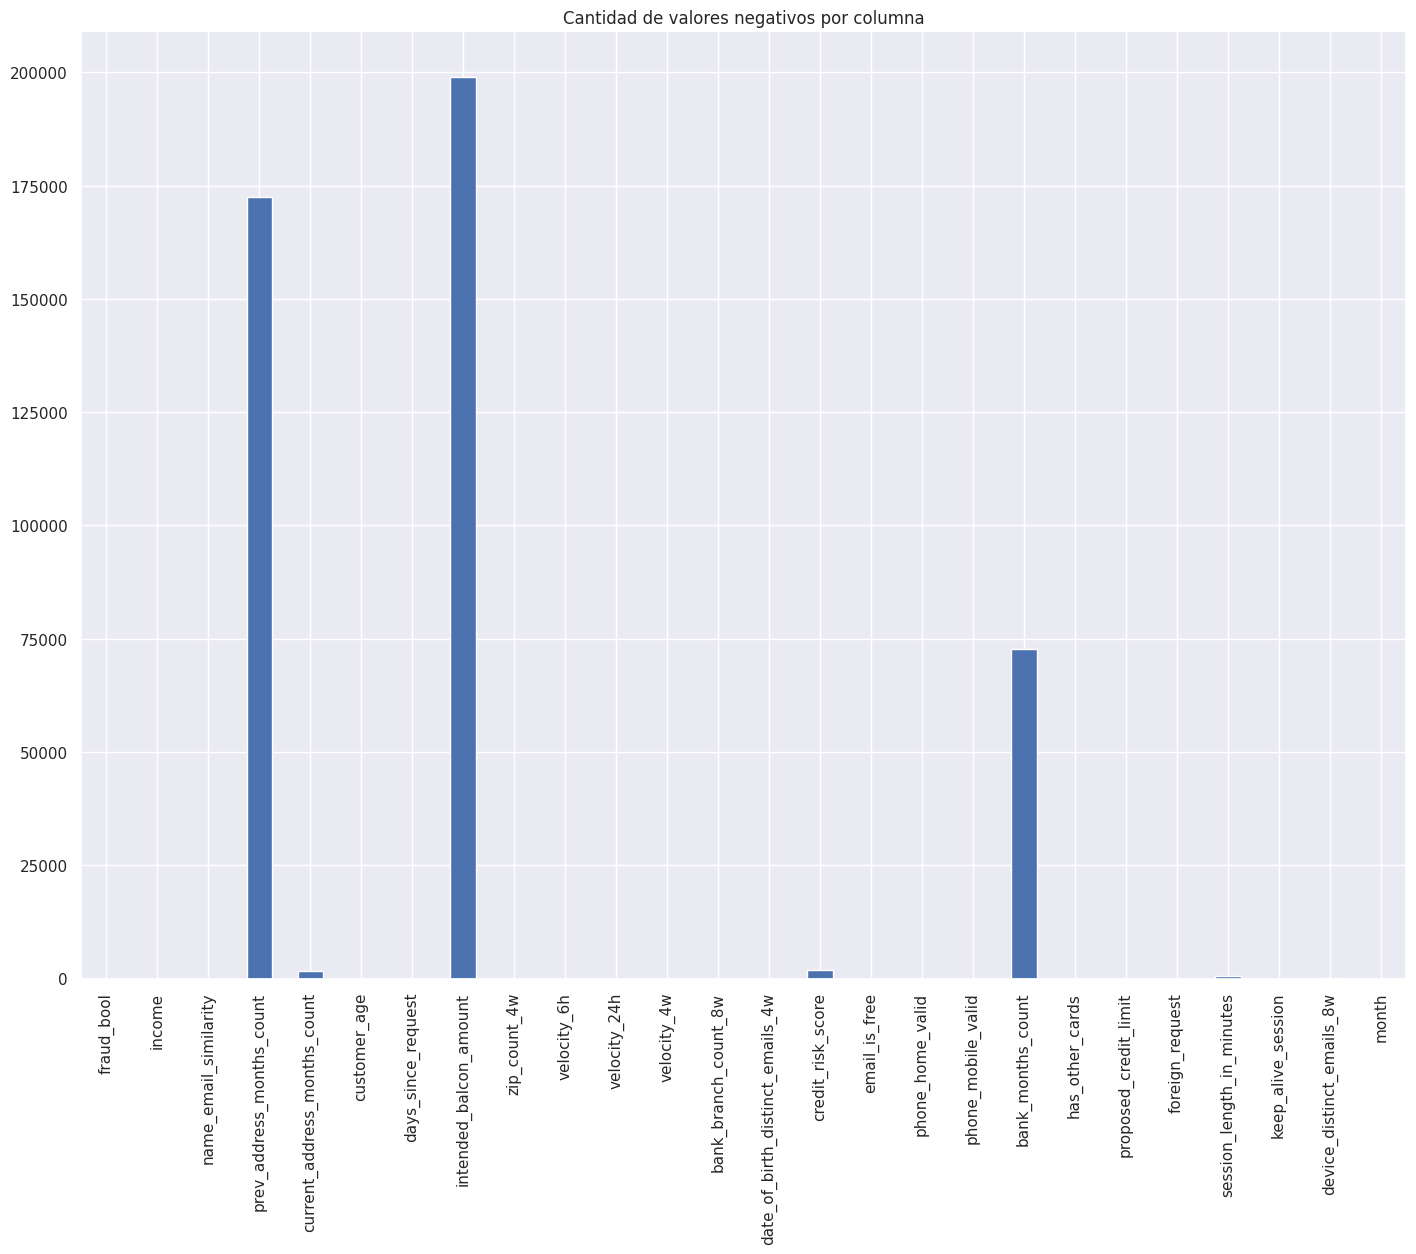

In [ ]:
negative_counts = (data < 0).sum()
negative_counts.plot(kind='bar')
plt.title('Cantidad de valores negativos por columna')
plt.show()

No parece haber valores faltantes, mas si hay gran cantidad de valores negativos en tres columnas, las cuales se deberan borrar ya que reemplazarlos puede generar overfitting. Procedo a modelar los datos reemplazando estos valores. Elegi la mediana ya que es un valor robusto y buscando detectar anomalias lo importante es no alterar el balance del promedio

In [ ]:
data = data.drop(['prev_address_months_count', 'intended_balcon_amount','bank_months_count'], axis = 1)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [ ]:
data[data < 0] = np.nan
imputer = SimpleImputer(strategy='median')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [ ]:
y = data['fraud_bool']
X = data.drop('fraud_bool', axis=1)
data.sample(10)
data.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
current_address_months_count        0
customer_age                        0
days_since_request                  0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
credit_risk_score                   0
email_is_free                       0
phone_home_valid                    0
phone_mobile_valid                  0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
session_length_in_minutes           0
keep_alive_session                  0
device_distinct_emails_8w           0
month                               0
dtype: int64

<h4>Metodo Backwards</h4>


Ahora que tengo la variable binaria clasificadora y las variables independientes en DATA, genero el modelo de regresion logistica para implementarlo al metodo backwards

In [ ]:
LRmodel = sm.Logit(y, sm.add_constant(X)).fit()

Optimization terminated successfully.
         Current function value: 0.065261
         Iterations 10


In [ ]:
pvalues = LRmodel.pvalues.drop('const')
while pvalues.max() > 0.05:
    # Aqui se elimina la variable cuyo p-valor sobrepasa el 0.5
    X = X.drop(pvalues.idxmax(), axis=1)
    # Se vuelve a correr el modelo
    LRmodel = sm.Logit(y, sm.add_constant(X)).fit()
    #Al final del bucle while se actualiza que la constante "const" se elimine de la variable que esta siendo iterada para que vuelva a correrse el loop
    pvalues = LRmodel.pvalues.drop('const')

Optimization terminated successfully.
         Current function value: 0.065261
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.065263
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.065267
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.065269
         Iterations 10


In [ ]:
print(LRmodel.summary())

                           Logit Regression Results                           
Dep. Variable:             fraud_bool   No. Observations:               265441
Model:                          Logit   Df Residuals:                   265422
Method:                           MLE   Df Model:                           18
Date:                Sat, 27 May 2023   Pseudo R-squ.:                  0.1681
Time:                        15:44:09   Log-Likelihood:                -17325.
converged:                       True   LL-Null:                       -20825.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -6.9673      0.142    -49.149      0.000      -7.245      -6.689
income                               1.0592      0.065     16.291

Como se muestra en el metodo, no se han podido elegir variables en base a su p-valor ya que todas presentan un p-valor debajo de los dos decimales de 0 por lo que la regresion logistica no es un modelo que sea "fittable" para el caso a analizar por lo que el valor por el cual vamos a considerar las variables en la correlacion con la variable dependiente clasificadora

In [ ]:
round(data.corr()['fraud_bool'].sort_values(ascending = False)[1:] ,2 )

proposed_credit_limit               0.08
credit_risk_score                   0.08
customer_age                        0.07
device_distinct_emails_8w           0.06
current_address_months_count        0.05
income                              0.04
email_is_free                       0.03
zip_count_4w                        0.02
foreign_request                     0.02
velocity_4w                         0.02
session_length_in_minutes           0.02
velocity_24h                        0.01
days_since_request                  0.00
velocity_6h                        -0.01
bank_branch_count_8w               -0.01
month                              -0.02
phone_mobile_valid                 -0.02
name_email_similarity              -0.04
phone_home_valid                   -0.04
has_other_cards                    -0.05
date_of_birth_distinct_emails_4w   -0.05
keep_alive_session                 -0.06
Name: fraud_bool, dtype: float64

In [ ]:
listCorrel = [x for x in data.columns if data.corr()["fraud_bool"][x] <= 0]

In [ ]:
print (listCorrel)

['name_email_similarity', 'velocity_6h', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'keep_alive_session', 'month']


Estas son las variables que se van a eliminar de la dataset ya que tienen una correlacion igual o menor a 0.01

In [ ]:
data = data.drop(['name_email_similarity', 'velocity_6h', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'keep_alive_session', 'month'], axis = 1)

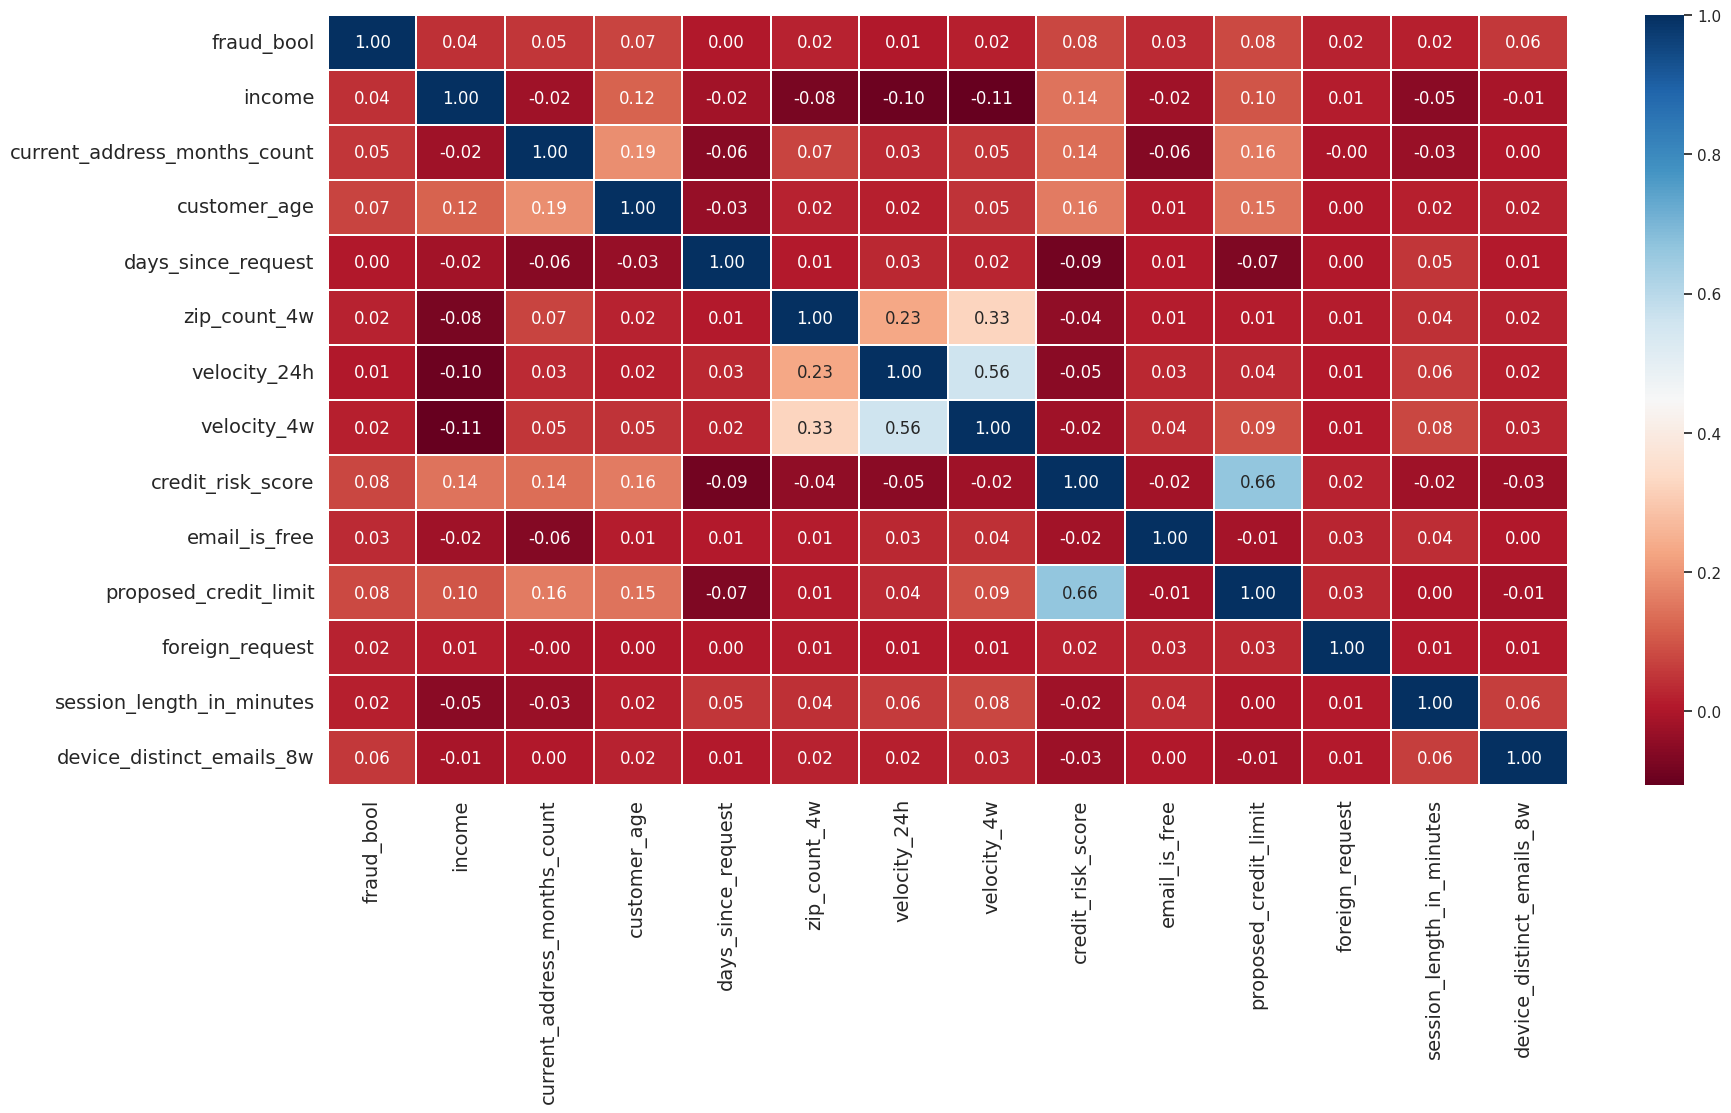

In [ ]:
fig, ax = plt.subplots(figsize=[20,10])
sns.heatmap(data.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.set_title('Heatmap de correlacion', fontdict=axtitle_dict)
fig.show()

###El algoritmo elegido en base a las variables analizadas es el de Random Forest.
Esto dado que:

> los modelos de Random Forest son ideales para los modelos de detección de fraude debido a su alta precisión y capacidad para manejar grandes cantidades de datos.
<br>

¿Como funciona?

<br>

- Se utilizan random trees para clasificar los objetos de datos, lo que significa que pueden identificar patrones complejos que pueden no detectarse fácilmente con los métodos tradicionales.

- En vistas a que no se obtuvieron buenos resultados aplicando regresion logistica por el ruido en el p-valor al momento de aplicar backward method este modelo resulta mas "fittable" para la problematica abordada

Dato no menor, los modelos de random forest son menos propensos al overfitting, lo que significa que es menos probable que produzcan resultados inexactos debido a que los datos son demasiado complejos o demasiado simples (cuestion que resulta nada despreciable dado que se tendra que realizar un metodo de resampling para balancear la muestra que resulta muy desbalanceada)

##Aplicacion del modelo Random Forest y Data Wrangling

Se aplica la dataset previo procesado de la misma al modelo elegido

##Random Forest

Se realiza la prueba del modelo random forest aplicada a la dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

Copio la dataset para poder eliminar las variables con baja correlacion y comenzar a hacer data wrangling a fines de ajustar el dataframe al modelo

In [ ]:
dataN = df.copy()

In [ ]:
dataN = dataN.drop(['name_email_similarity', 'prev_address_months_count', 'intended_balcon_amount', 'velocity_6h', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'keep_alive_session', 'month', 'device_fraud_count', 'bank_months_count'], axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265441 entries, 0 to 265440
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   fraud_bool                    265441 non-null  float64
 1   income                        265441 non-null  float64
 2   current_address_months_count  265441 non-null  float64
 3   customer_age                  265441 non-null  float64
 4   days_since_request            265441 non-null  float64
 5   zip_count_4w                  265441 non-null  float64
 6   velocity_24h                  265441 non-null  float64
 7   velocity_4w                   265441 non-null  float64
 8   credit_risk_score             265441 non-null  float64
 9   email_is_free                 265441 non-null  float64
 10  proposed_credit_limit         265441 non-null  float64
 11  foreign_request               265441 non-null  float64
 12  session_length_in_minutes     265441 non-nul

In [ ]:
columnCategory = []
for x in dataN.columns:
  if(dataN[x].nunique()<10) and (dataN[x].dtype =="object"):
    columnCategory.append(x )
numericColumns = list(set(dataN.columns) - set(columnCategory))
numericColumns = [x for x in numericColumns if x != "fraud_bool"]
print(f"Columnas numericas son: {numericColumns}")
print(len(numericColumns))

Columnas numericas son: ['current_address_months_count', 'credit_risk_score', 'device_distinct_emails_8w', 'foreign_request', 'velocity_24h', 'days_since_request', 'income', 'customer_age', 'zip_count_4w', 'proposed_credit_limit', 'velocity_4w', 'email_is_free', 'session_length_in_minutes']
13


Dado que el dataframe presenta variables categoricas y variables numericas negativas y NAN, no puedo aplicar simplemente un metodo para modelar las variables continuas, ya que este chocará con las variables string. Tampoco puedo convertir las varaibles catergoricas a dummy ya que las variables NaN y negativas me impiden amplicar un metodo. Por esto primero debo crear un dataframe con las variables continuas que modelar, luego agregarle las columnas categoricas, luego convertir las mismas a dummys y finalmente fittear la dataframe procesada al modelo

In [ ]:
numeric=dataN.drop(['payment_type', 'employment_status', 'housing_status', 'source', 'device_os'], axis=1)

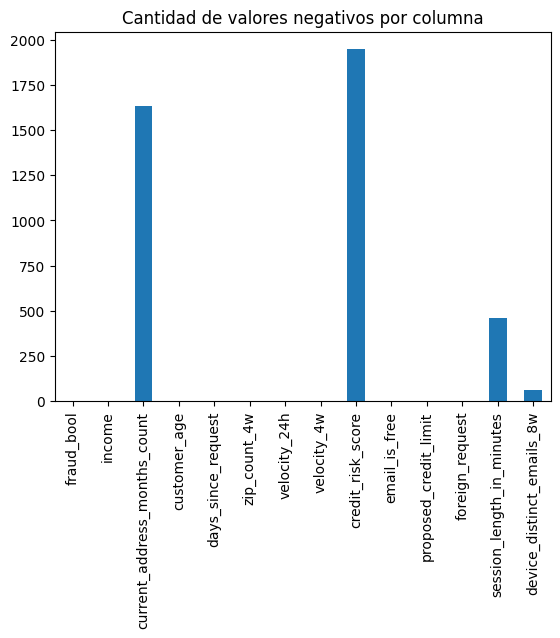

In [ ]:
negative_counts = (numeric < 0).sum()
negative_counts.plot(kind='bar')
plt.title('Cantidad de valores negativos por columna')
plt.show()

Menos de 2000 valores negativos, es manejable modelando los datos y reemplazando los negativos con una medida robusta como la mediana

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
numeric = pd.DataFrame(imputer.fit_transform(numeric), columns=numeric.columns)

In [ ]:
numeric[numeric < 0] = np.nan
imputer = SimpleImputer(strategy='median')
numeric = pd.DataFrame(imputer.fit_transform(numeric), columns=numeric.columns)

In [ ]:
numeric.isnull().sum()

fraud_bool                      0
income                          0
current_address_months_count    0
customer_age                    0
days_since_request              0
zip_count_4w                    0
velocity_24h                    0
velocity_4w                     0
credit_risk_score               0
email_is_free                   0
proposed_credit_limit           0
foreign_request                 0
session_length_in_minutes       0
device_distinct_emails_8w       0
dtype: int64

Ya purifique la dataset numerica reemplazando los NaN y los negativos, ahora volveré a mergear con las columnas categorias para aplicar el OneHotEncoder

In [ ]:
categorycal = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

In [ ]:
data_processed = pd.concat([numeric, df[categorycal]], axis=1)

In [ ]:
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265441 entries, 0 to 265440
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   fraud_bool                    265441 non-null  float64
 1   income                        265441 non-null  float64
 2   current_address_months_count  265441 non-null  float64
 3   customer_age                  265441 non-null  float64
 4   days_since_request            265441 non-null  float64
 5   zip_count_4w                  265441 non-null  float64
 6   velocity_24h                  265441 non-null  float64
 7   velocity_4w                   265441 non-null  float64
 8   credit_risk_score             265441 non-null  float64
 9   email_is_free                 265441 non-null  float64
 10  proposed_credit_limit         265441 non-null  float64
 11  foreign_request               265441 non-null  float64
 12  session_length_in_minutes     265441 non-nul

In [ ]:
data_processed = pd.get_dummies(data_processed, columns=['payment_type', 'employment_status', 'housing_status', 'source', 'device_os'])

Ahora puedo fittearla al modelo

In [ ]:
y = data_processed.loc[:,"fraud_bool"]
X = data_processed.drop(["fraud_bool"], axis=1)

Separo en set de entrenamiento y de testing:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Creo el modelo de Random Forest:

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

Entreno el modelo:

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:")
print(confusion)

Accuracy: 0.9842527595343639
Confusion matrix:
[[78373     1]
 [ 1253     6]]


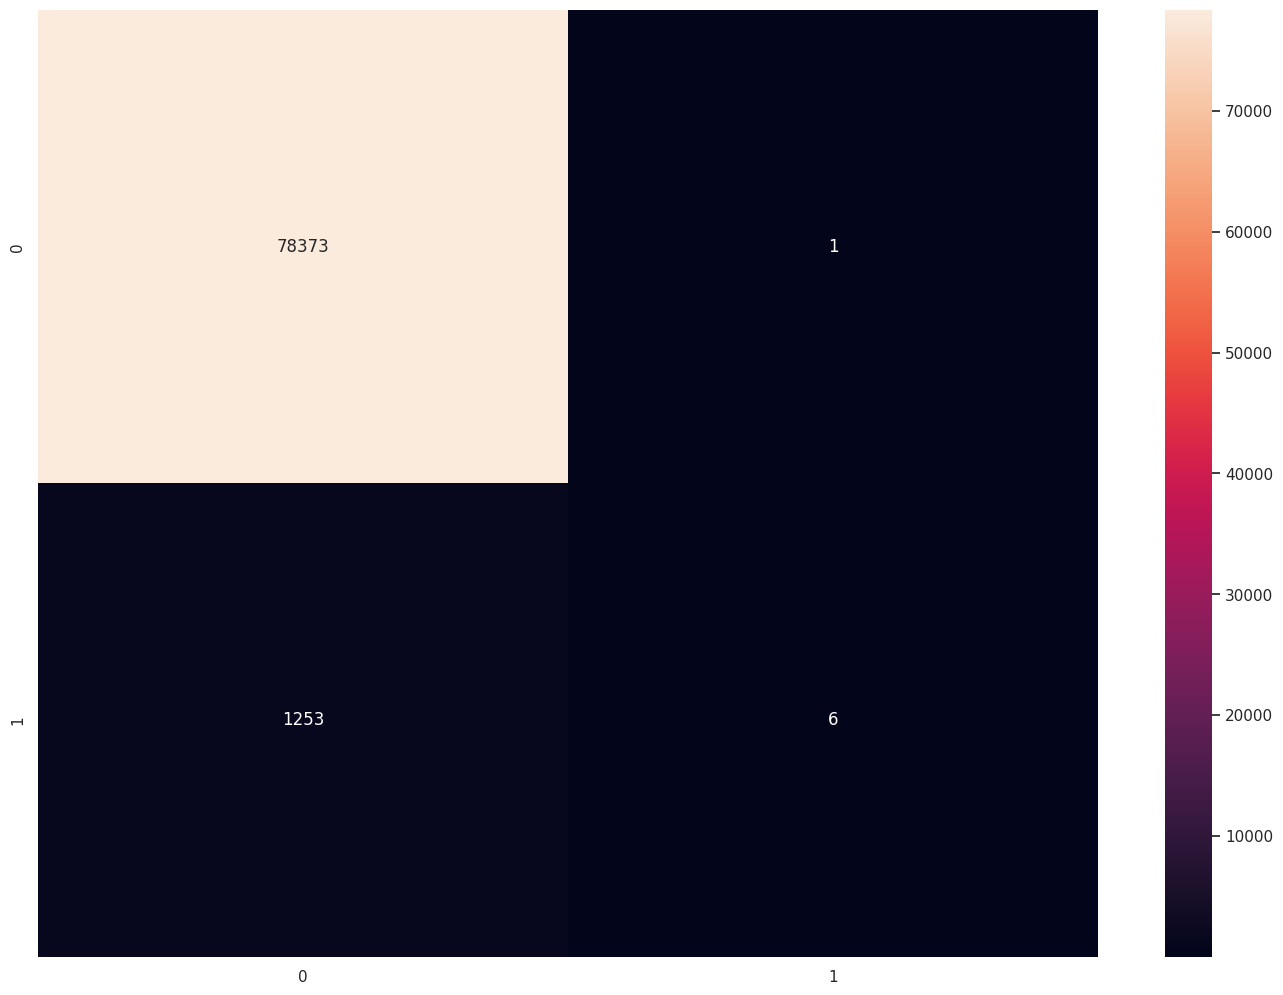

In [ ]:
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall:', recall)

Recall: 0.004765687053216839


###Conclusiones preliminares:
- El modelo de random forest presenta buenos resultados preliminares pero <font color = lightgreen>se debe pulir sobre ciertas cuestiones</font>
-El modelo tiene alta especificidad (identifica muy bien los casos que son negativos y no arroja falsos positivos), pero baja sensitividad (no tiene buen tradeoff para los verdaderos positivos)
- El modelo tiene un recall <strong>bajo</strong>
- El modelo da muchos casos de fraude positivo como no-fradulentos, eso *debe corregirse*
<br>

<strong>Esto nos da la pauta de que:</strong>
- La muestra esta muy desbalanceada y el modelo no puede aprender correctamente a identificar al grupo minoritario
- Se deben aplicar tecnicas de resampling a futuro a fin de balancear la dataset para entrenar el modelo, probando tanto oversampling como undersampling para considerar que tecnica tiene mejores resultados

###Realizando prueba de PCA con la dataset antes de aplicar SMOTE

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265441 entries, 0 to 265440
Data columns (total 39 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   income                        265441 non-null  float64
 1   current_address_months_count  265441 non-null  float64
 2   customer_age                  265441 non-null  float64
 3   days_since_request            265441 non-null  float64
 4   zip_count_4w                  265441 non-null  float64
 5   velocity_24h                  265441 non-null  float64
 6   velocity_4w                   265441 non-null  float64
 7   credit_risk_score             265441 non-null  float64
 8   email_is_free                 265441 non-null  float64
 9   proposed_credit_limit         265441 non-null  float64
 10  foreign_request               265441 non-null  float64
 11  session_length_in_minutes     265441 non-null  float64
 12  device_distinct_emails_8w     265441 non-nul

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your dataset
y = data_processed.loc[:,"fraud_bool"]
X = data_processed.drop(["fraud_bool"], axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

In [ ]:
rfc2 = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rfc2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rfc2.predict(X_test)

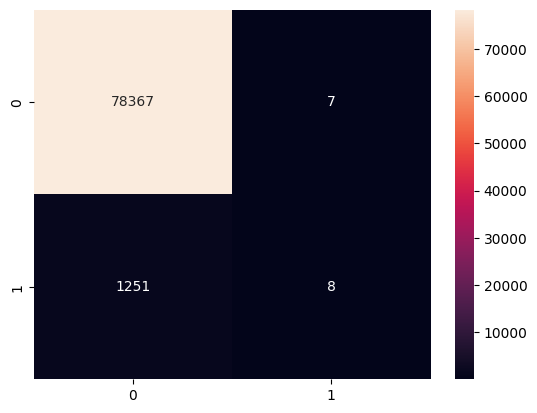

In [ ]:
y_pred = rfc2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

Conclusion preliminar: La aplicacion de PCA y Scaling no parece tener un efecto positivo en la muestra, por lo que no lo considero relevante para la performance del modelo.

## Ajustando el modelo

Para balancear la dataset utilizaremos la tecnica de SMOTE
Se importa le objeto y se dan los parametros para que balancee la dataset separando la variable dependiente clasificadora en y = fraud bool  x = independent variables

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)

In [ ]:
y_overs = data_processed.loc[:,"fraud_bool"]
x_overs = data_processed.drop(["fraud_bool"], axis=1)

In [ ]:
X_resampled, y_resampled = sm.fit_resample(x_overs, y_overs)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:")
print(confusion)

Accuracy: 0.992744845525138
Confusion matrix:
[[78407    46]
 [ 1092 77309]]


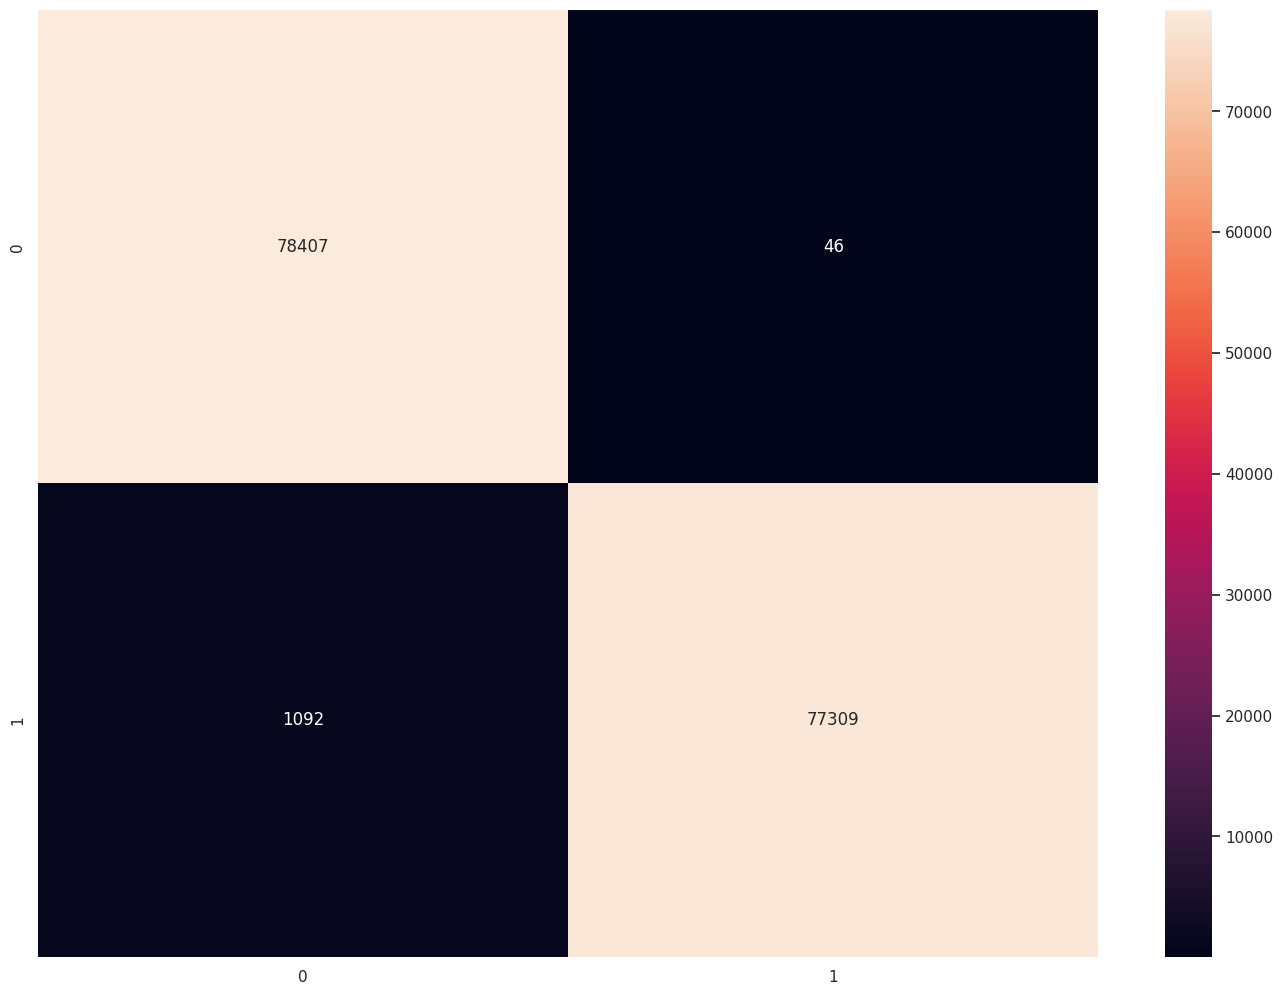

In [ ]:
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

Precision: 0.9994053390213948
Recall: 0.9860716062295124
F1 Score: 0.9926937004031947
ROC AUC: 0.9927426339561517


In [ ]:
importances = rfc.feature_importances_


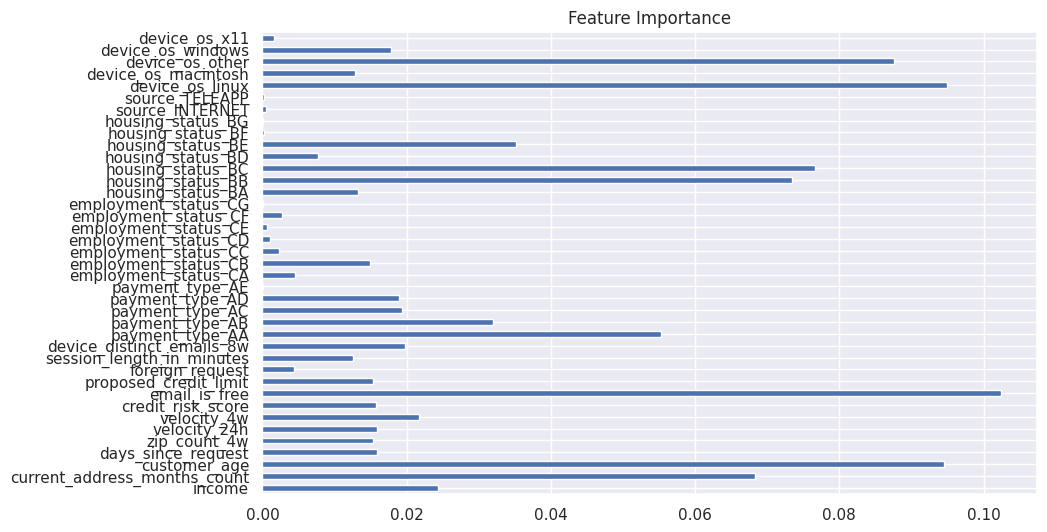

In [ ]:
series = pd.Series(importances, index=x_overs.columns)
series.plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

####Ajustando el modelo utilizando cross validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
random_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 30, 50, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [130, 180, 230]
}

# Use the random grid to search for best hyperparameters
rf_random = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=random_grid,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the random search model
rf_random.fit(X_train, y_train)

Esta forma de hacer hyperparameter tunning es demasiado costosa en terminos de recursos de computo (lleva corriendo mas de una hora), por lo que probaré otro metodo en el cual los "param_distributions" seran asignadas al azar sobre 10 iteraciones sobre 2 campos: "n_estimators" y "max_depth"

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Specify the hyperparameter distributions to sample from
param_distributions = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 10)
}

# Create a randomized search object
random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    n_jobs=-1
)

# Fit the randomized search object to the data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_


In [ ]:
best_params

{'max_depth': 9, 'n_estimators': 82}

In [ ]:
rf = RandomForestClassifier(**best_params)

# Fit the random forest classifier to the data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=82)

In [ ]:
pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print("Confusion matrix:")
print(confusion)

Accuracy: 0.992744845525138
Precision: 0.9994053390213948
Recall: 0.9860716062295124
F1 Score: 0.9926937004031947
ROC AUC: 0.9927426339561517
Confusion matrix:
[[78407    46]
 [ 1092 77309]]


No se ven cambios al haber alterado los hyperparametros mediante este tunning. Se deberá probar con una mayor cantidad de iteraciones, o bien, con otro medoto para ajustar los hyperparametros

##Probando alternativas al modelo Random Forest con las variables procesadas

Vamos a considerar hacer pruebas simples con otros modelos para comparar el acuracy del random forest en su version base (sin PCA, sin SMOTE) para analizar si podria ser mejorable aplicar otro modelo

###Gradient Boosting Machine

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions on new data
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print('Confusion Matrix:')
print(cm)
print('Accuracy:', accuracy)

Confusion Matrix:
[[78325    49]
 [ 1211    48]]
Accuracy: 0.984177413886203


###Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions on new data
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print('Confusion Matrix:')
print(cm)
print('Accuracy:', accuracy)

Confusion Matrix:
[[78352    22]
 [ 1255     4]]
Accuracy: 0.983963934549747


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ya que el numero de iteraciones maximas en el modelo de sklearn es 100, probemos aumentando el numero de iteraciones en un orden de magnitud a 1000

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the model with a higher max_iter value
model = LogisticRegression(max_iter=1000)

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions on new data
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print('Confusion Matrix:')
print(cm)
print('Accuracy:', accuracy)

Confusion Matrix:
[[78374     0]
 [ 1258     1]]
Accuracy: 0.9842025291022566


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Se aprecia una mejora (no habria falsos negativos, aunque solo detecto un verdadero negativo). Vamos a intentar optimizar la regresion logistica para ver si obtiene un mejor resultado que compita con el randomForest generando tambien un aumento de las muestras (oversampling)

## Probando Logistic Regression realizando wrangling asi como el saneamiento de la data desde un principio

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
url = 'https://drive.google.com/file/d/1vbxDHn39f_U3lsGxYfOJlfg7pH7Vt3Q4/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.sample(10)

In [ ]:
dataL = df.copy()
dataL = dataL.drop(['name_email_similarity', 'prev_address_months_count', 'intended_balcon_amount', 'velocity_6h', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'keep_alive_session', 'month', 'device_fraud_count', 'bank_months_count'], axis = 1)

In [ ]:
dataL.head(2)

fraud_bool  income  current_address_months_count  customer_age  \
0           1     0.9                            88            50   
1           1     0.9                           144            50   

   days_since_request payment_type  zip_count_4w  velocity_24h  velocity_4w  \
0            0.020925           AA           769   3134.319630  3863.647740   
1            0.005418           AB           366   2670.918292  3124.298166   

  employment_status  credit_risk_score  email_is_free housing_status  \
0                CA              185.0            0.0             BA   
1                CA              259.0            1.0             BA   

   proposed_credit_limit  foreign_request    source  \
0                  500.0              0.0  INTERNET   
1                 1500.0              0.0  INTERNET   

   session_length_in_minutes device_os  device_distinct_emails_8w  
0                   3.888115   windows                        1.0  
1                  31.798819   windows                        1.0

Ahora hacemos el mismo proceso de limpiar los datos y obtener los dummys y corramos el modelo de regresion logistica con la dataset balanceada

In [ ]:
from sklearn.impute import SimpleImputer
numeric=dataL.drop(['payment_type', 'employment_status', 'housing_status', 'source', 'device_os'], axis=1)
imputer = SimpleImputer(strategy='median')
numeric = pd.DataFrame(imputer.fit_transform(numeric), columns=numeric.columns)
numeric[numeric < 0] = np.nan
imputer = SimpleImputer(strategy='median')
numeric = pd.DataFrame(imputer.fit_transform(numeric), columns=numeric.columns)
categorycal = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
df_procesed = pd.concat([numeric, dataL[categorycal]], axis=1)

In [ ]:
imputer_cat = SimpleImputer(strategy='most_frequent')
categorical = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
cat_data = df_procesed[categorical]
cat_data_imputed = pd.DataFrame(imputer_cat.fit_transform(cat_data), columns=cat_data.columns)
df_procesed[categorical] = cat_data_imputed

In [ ]:
df_procesed.isnull().sum()

fraud_bool                      0
income                          0
current_address_months_count    0
customer_age                    0
days_since_request              0
zip_count_4w                    0
velocity_24h                    0
velocity_4w                     0
credit_risk_score               0
email_is_free                   0
proposed_credit_limit           0
foreign_request                 0
session_length_in_minutes       0
device_distinct_emails_8w       0
payment_type                    0
employment_status               0
housing_status                  0
source                          0
device_os                       0
dtype: int64

In [ ]:
data_cleaned = pd.get_dummies(df_procesed, columns=['payment_type', 'employment_status', 'housing_status', 'source', 'device_os'])

Primero corramos el modelo con los datos nuevamente procesados

In [ ]:
y = data_cleaned.loc[:,"fraud_bool"]
X = data_cleaned.drop(["fraud_bool"], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=1000)

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions on new data
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print('Confusion Matrix:')
print(cm)
print('Accuracy:', accuracy)

Confusion Matrix:
[[78372     2]
 [ 1257     2]]
Accuracy: 0.9841899714942298


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Nuevamente, no es mal resultado, pero el modelo no tiene buen tradeoff para detectar los verdaderos positivos ¿Que pasa si balanceo la dataset con UNDERSAMPLING?

In [ ]:
from sklearn.utils import resample
data_cleaned_majority = data_cleaned[data_cleaned.fraud_bool	==0]
data_cleaned_minority = data_cleaned[data_cleaned.fraud_bool	==1]
data_cleaned_majority_undersampled = resample(data_cleaned_majority,
                                    replace=False,
                                    n_samples=len(data_cleaned_minority),
                                    random_state=42)
df_undersampled = pd.concat([data_cleaned_majority_undersampled, data_cleaned_minority])
print(round(df_undersampled["fraud_bool"].value_counts()/len(df_undersampled["fraud_bool"]),2))

0.0    0.5
1.0    0.5
Name: fraud_bool, dtype: float64


In [ ]:
y = df_undersampled.loc[:,"fraud_bool"]
X = df_undersampled.drop(["fraud_bool"], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=1000)

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions on new data
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print('Confusion Matrix:')
print(cm)
print('Accuracy:', accuracy)

Confusion Matrix:
[[903 289]
 [346 873]]
Accuracy: 0.7366238075487349


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


La deteccion de verdaderos positivos mejora pero el acuraccy del modelo en general es muy baja. Ademas, los datos tienen que ser procesados mucho mas que los que coresponden al RandomForest, por lo que este ultimo parece la mejor opcion

##Conclusiones

El modelo mas adecuado parece ser el RandomForest ya que presenta el mejor tradeoff entre falsos positivos y falsos negativos. Los demas modelos presentan alta especificidad, pero poca precision. Solo el RandomForest presenta una ligera optimizacion respecto de otros modelos de clasificación para encontrar los TP|TN dentro de la matriz de confusion.
Sus metricas son:

* Accuracy: 0.992744845525138

* Precision: 0.9994053390213948

* Recall: 0.9860716062295124

* F1 Score: 0.9926937004031947

* ROC AUC: 0.9927426339561517

###Respuesta de las preguntas

A lo largo de este trabajo y logrando un modelo que tiene una buena tasa de deteccion, se ha logrado responder a las preguntas planteadas al comienzo del mismo suponiendo que el modelo podra detectar los verdaderos negativos con eficacia reduciendo notablemente la carga de trabajo en la auditoria de las solicitudes. A saber:

1. Al implementar un método de detección de fraudes en las solicitudes de crédito, una entidad financiera/banco/fintech puede beneficiarse al:
   - Reducir las pérdidas financieras causadas por fraudes en las solicitudes de crédito aprobadas.
   - Mejorar la reputación y confianza de los clientes al mostrar un compromiso activo en la protección contra fraudes.
   - Optimizar la asignación de recursos al enfocarse en las solicitudes más confiables y reducir el tiempo y los costos asociados con la revisión manual de todas las solicitudes.

2. Al auditar las solicitudes de crédito mediante este método de detección de fraudes, la tasa de victimización de los clientes podría reducirse al:
   - Identificar y rechazar de manera más efectiva las solicitudes fraudulentas antes de que se aprueben los créditos.
   - Evitar que los clientes legítimos sean víctimas de fraude y sufran pérdidas financieras o daños a su reputación crediticia.

3. El impacto potencial de predecir y filtrar las solicitudes fraudulentas en términos de seguridad y confianza para los clientes de una entidad financiera/banco/fintech es:
   - Mayor seguridad financiera al reducir la probabilidad de fraude en las transacciones y evitar consecuencias negativas para los clientes.
   - Aumento de la confianza de los clientes al percibir que la entidad está tomando medidas proactivas para proteger sus intereses y salvaguardar sus activos financieros.

4. Los beneficios económicos para una entidad financiera al implementar un sistema de detección de fraudes en las solicitudes de crédito podrían incluir:
   - Reducción de pérdidas financieras causadas por fraudes en las solicitudes aprobadas.
   - Ahorro de recursos al evitar costosos procesos de recuperación de fondos o litigios asociados con casos de fraude.
   - Mejora de la rentabilidad general al mantener una cartera de préstamos más saludable y minimizar los riesgos financieros.

5. Al utilizar este método de detección de fraudes en las solicitudes de crédito, una entidad financiera/banco/fintech podría mejorar su eficiencia operativa al:
   - Automatizar el proceso de evaluación de solicitudes y reducir la carga de trabajo manual.
   - Priorizar y enfocar los esfuerzos del personal en casos sospechosos, optimizando los recursos humanos y reduciendo los tiempos de respuesta.

6. Las implicaciones legales y reputacionales para una entidad financiera que no implemente un sistema efectivo de detección de fraudes en las solicitudes de crédito podrían ser:
   - Posible responsabilidad legal por permitir fraudes y no proteger adecuadamente los intereses de los clientes.
   - Pérdida de confianza y reputación entre los clientes, lo que podría afectar negativamente la retención de clientes y la adquisición de nuevos clientes.

7. Al garantizar un mayor control y seguridad en el proceso de solicitud de crédito mediante la detección de fraudes, una entidad financiera/banco/fintech podría mejorar la experiencia del cliente al:
   - Proporcionar una respuesta más rápida y eficiente a las solicitudes legítimas, evitando retrasos innecesarios.
   - Transmitir la imagen de una entidad comprometida con la protección de los clientes y su bienestar financiero, lo que puede generar confianza y lealtad a largo plazo.